# Pure PdH

[[0.         0.81967882 0.21640444 0.123     ]]
auto loaded stepsName:  ['* + CO$_{2}$', 'HOCO*', 'CO*', '* + CO']
auto loaded obserName:  ['PdH']
auto loaded data: 
 [[0.         0.81967882 0.21640444 0.123     ]]
reload: ['* + CO$_{2}$', 'HOCO*', 'CO*', '* + CO']
reload: ['PdH'] 



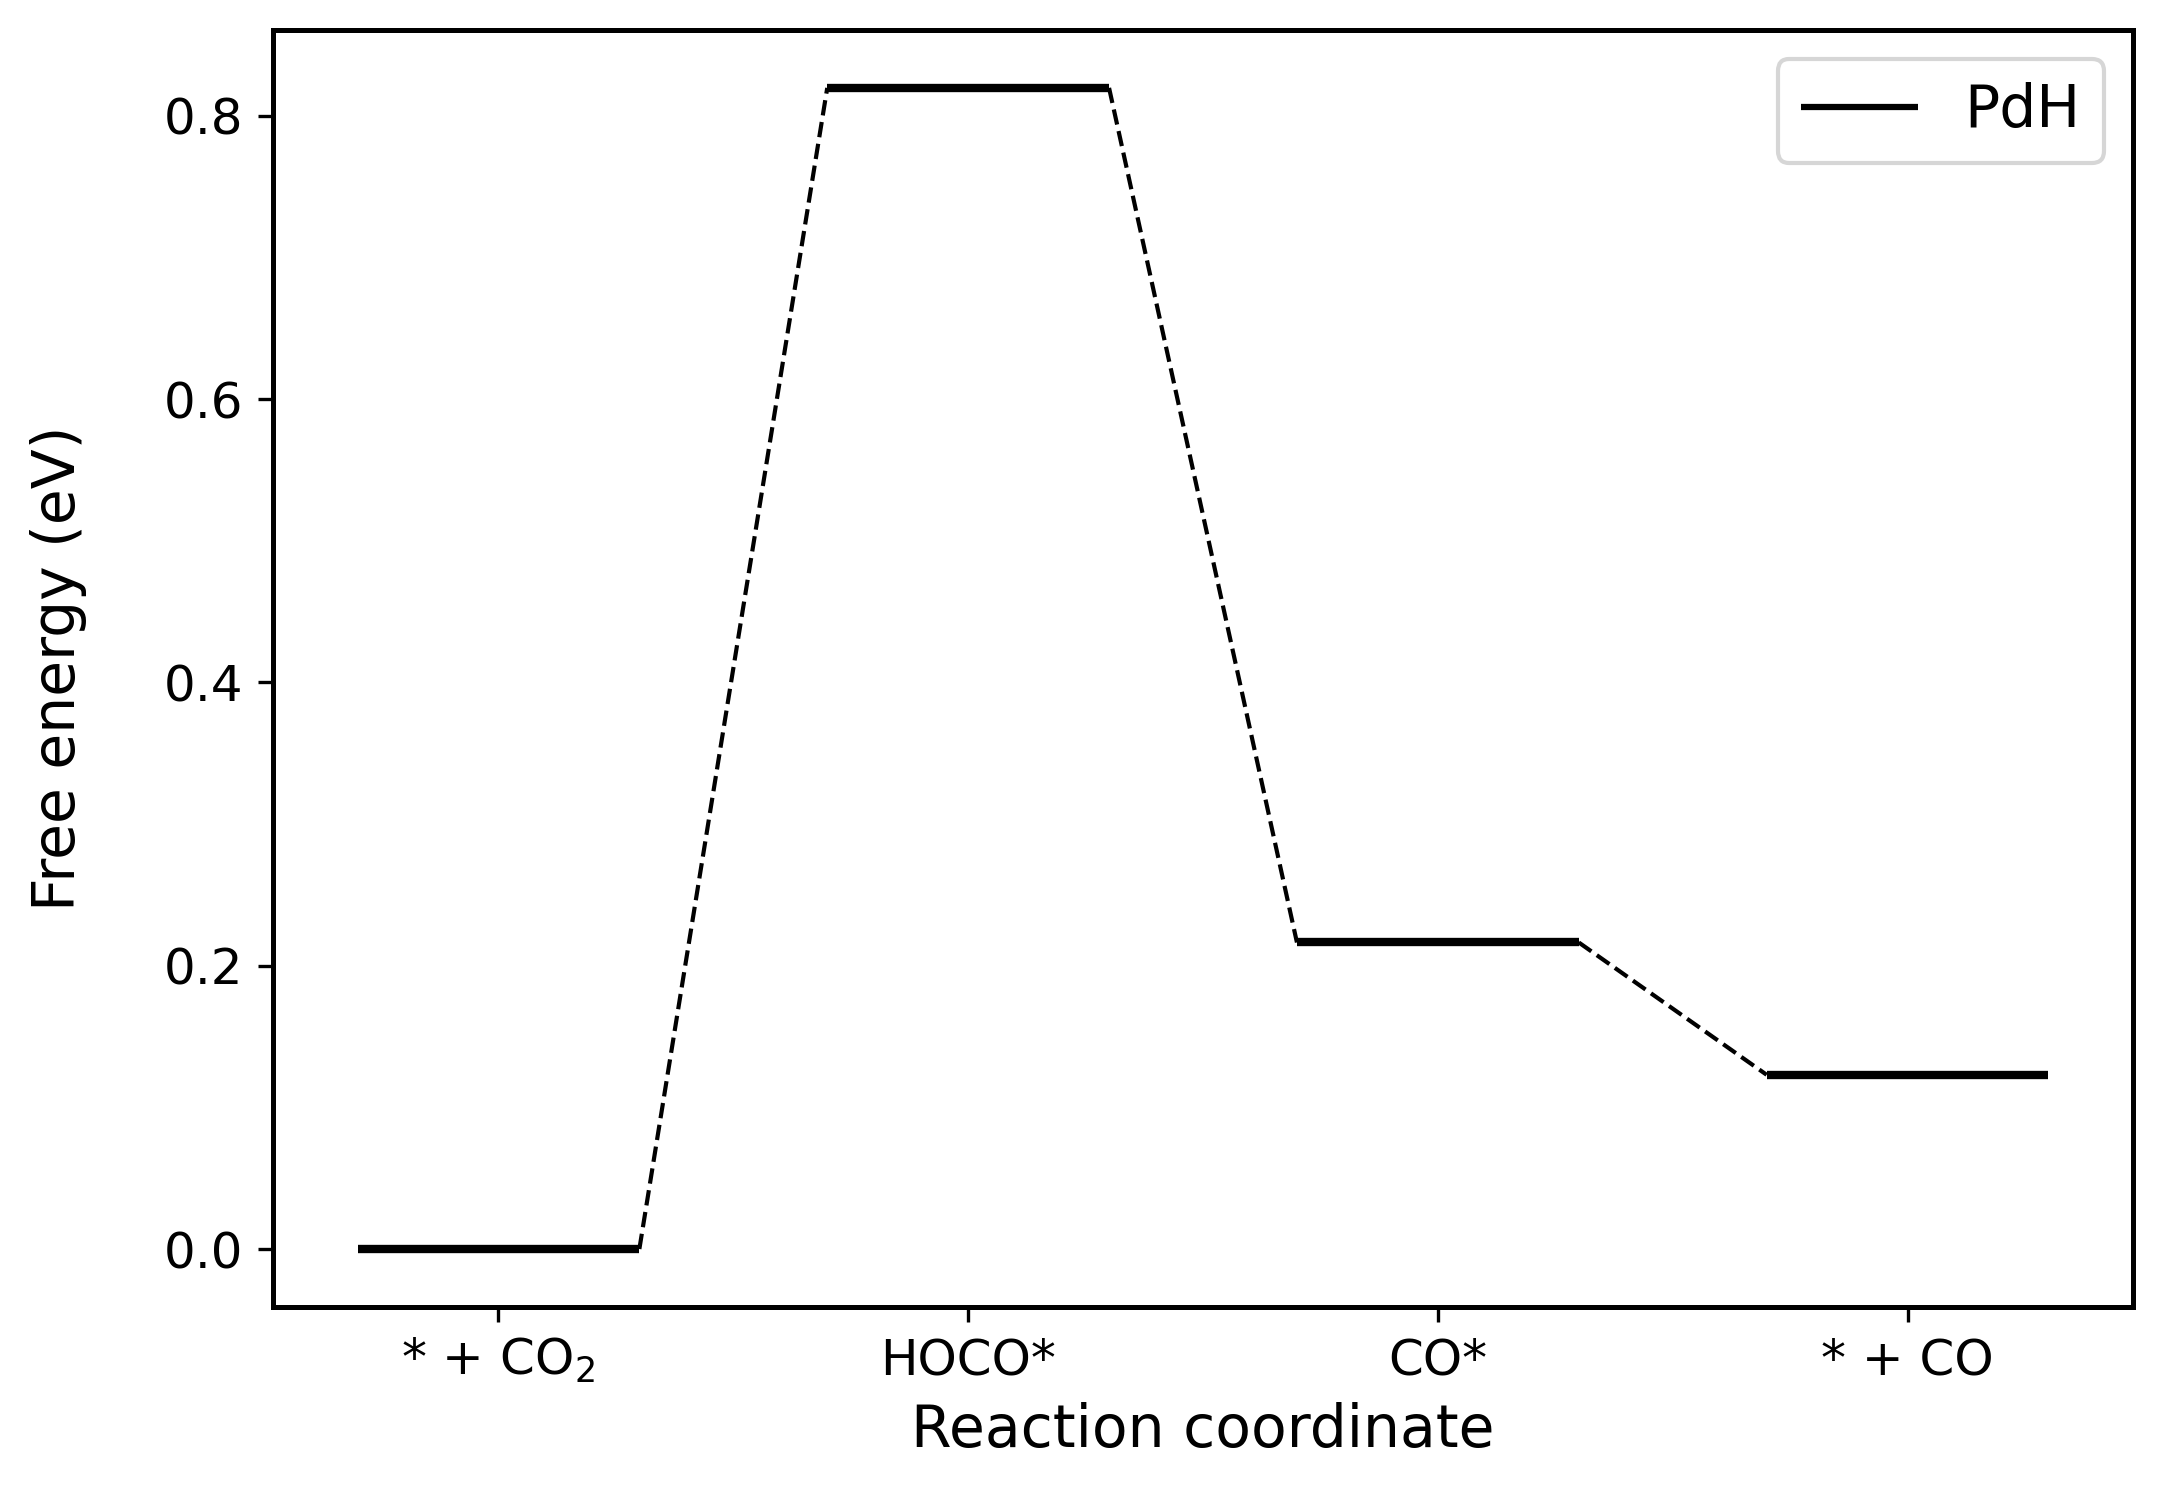

In [3]:
%matplotlib inline
import sys
sys.path.append("../../..")

from plotpackage.lib.io import read_excel, read_csv
from plotpackage.lib.CO2RR import CO2RRFEDplot
from plotpackage.lib.scalingrelation import ScalingRelationPlot
from plotpackage.lib.figsmetadata import FigsMetaData
import matplotlib.pyplot as plt
import numpy as np

filename = './sites.xlsx'
#change it for excel and csv; ignore sheet, min_row, max_row, row_of_tag and col_of_ini_tag for csv
min_col = 1+18 #1st column in excel
max_col = 5+18 #5th column in excel

#change it only for excel
sheet = 'single_b' #Sheet1 by defaut
# min_row = 20 #1st column in excel
# max_row = 37 #9st column in excel
min_row = 1+1 #1st column in excel
max_row = 24+1 #9st column in excel

#saved figure name
figName1 = './paper1/Pure_FreeEnergyDiagram.jpg'  #free energy diagram name
# figName2 = './paper1/ScalingRelation_' + sheet + '.jpg' #scaling reation figure name

############ plot free energy diagram ###############

stepsNames, observationName, X = read_excel(filename, sheet, min_col, max_col, min_row, max_row) #load excel data
#stepsNames, observationName, X = read_csv(filename, , min_col, max_col) #load csv data

# # del rows; delete according to element names in excel
del_ele = [ 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Y', 'Zr', 'Nb', 'Mo', 'Ru', 'Rh', 'Ag', 'Cd', 'Hf', 'Ta', 'W', 'Re']
del_rows = [observationName.index(each)+2 for each in del_ele]
### del_rows = [10, 12, 13, 18]  #delete according to rows in excel
del_list = [x -2 for x in del_rows]
observationName = np.delete(observationName, del_list, 0)
X = np.delete(X, del_list, 0)
print(X)
stepsNames = ['* + CO$_{2}$', 'HOCO*', 'CO*', '* + CO']  #reload step name for CO2RR
observationName = ["PdH",]
CO2RRdiagram = CO2RRFEDplot(stepsNames, observationName, X, figName1)
###costom connection
# CO2RRdiagram.add_link(start_id=0, end_id=3)
# CO2RRdiagram.remove_link(start_id=0, end_id=1)
CO2RRdiagram.plot(save = True, title=None)


In [2]:
# from plotpackage.lib.io import read_excel, read_csv
# from plotpackage.lib.HER import HERFEDplot
# from plotpackage.lib.figsmetadata import FigsMetaData
# import matplotlib.pyplot as plt

# ############only part needs to change##############
# filename = '../../data/HER.xlsx'

# #change it for excel and csv; ignore sheet, min_row, max_row, row_of_tag and col_of_ini_tag for csv
# min_col = 1 #1st column in excel
# max_col = 4 #4th column in excel

# #change it only for excel
# sheet = 'top-new' #Sheet1 by defaut
# min_row = 1 #1st column in excel
# max_row = 11 #11th column in excel

# #saved figure name
# figName = './paper1/Pure_HER_FreeEnergyDiagram.jpg'  #free energy diagram name

# ############ plot free energy diagram ###############

# stepsNames, observationName, X = read_excel(filename, sheet, min_col, max_col, min_row, max_row) #load excel data

# selected_ele = ['Pure']
# ranges = [observationName.index(each)+2 for each in selected_ele]
# observationName = [observationName[i-2] for i in ranges]
# selected_rows = [i-2 for i in ranges]
# X = X[selected_rows,:]


# stepsNames = ['* + $H^{+}$', 'H*', '* + $1/2H_{2}$']  #reload step name for CO2RR
# observationName = ["PdH",]

# HERdiagram = HERFEDplot(stepsNames, observationName, X, figName)
# HERdiagram.plot(title='')

auto loaded stepsName:  ['* + $H^{+}$', 'H*', '* + $1/2H_{2}$']
auto loaded obserName:  ['PdH']
auto loaded data: 
 [[0.        0.5006168 0.       ]]
reload: ['* + $H^{+}$', 'H*', '* + $1/2H_{2}$']
reload: ['PdH'] 



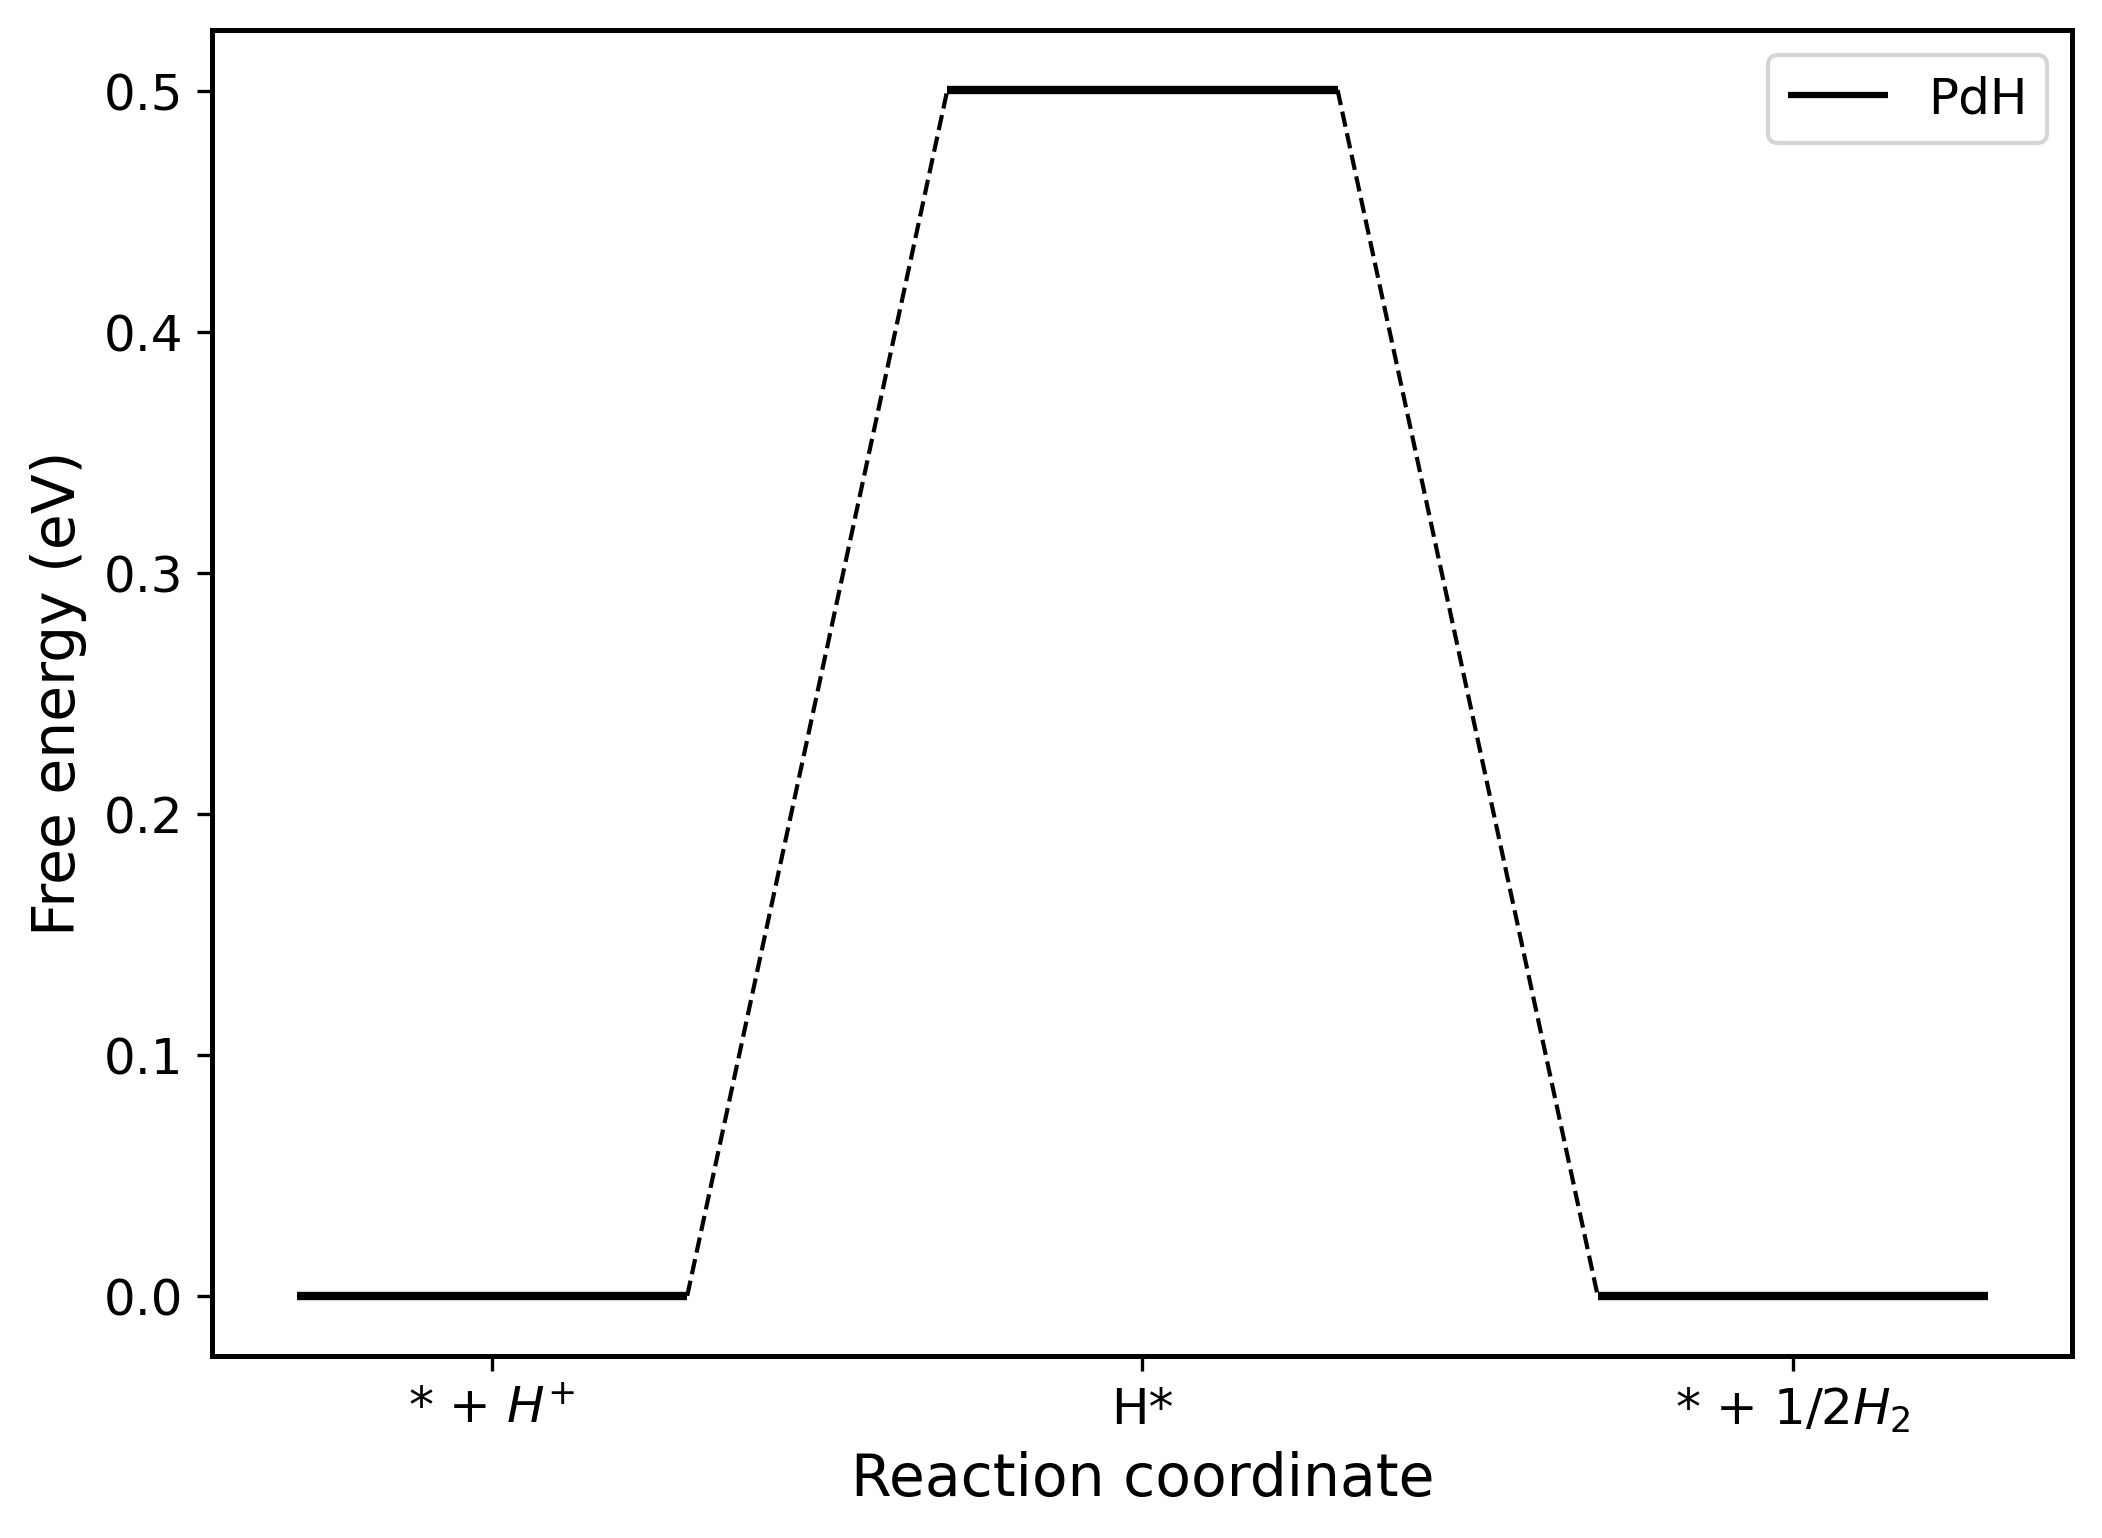

In [5]:
from plotpackage.lib.io import read_excel, read_csv
from plotpackage.lib.HER import HERFEDplot
from plotpackage.lib.figsmetadata import FigsMetaData
import matplotlib.pyplot as plt
import xlrd

############only part needs to change##############
filename = './sites.xlsx'

#change it for excel and csv; ignore sheet, min_row, max_row, row_of_tag and col_of_ini_tag for csv
min_col = 27-1 #1st column in excel
max_col = 27 #5th column in excel

#change it only for excel
sheet = 'single_b' #Sheet1 by defaut
min_row = 1+1 #1st column in excel
max_row = 2+1 #9st column in excel

#saved figure name
figName = './paper1/Pure_HER_FreeEnergyDiagram.jpg'  #free energy diagram name

############ plot free energy diagram ###############

# stepsNames, observationName, X = read_excel(filename, sheet, min_col, max_col, min_row, max_row) #load excel data
doc = xlrd.open_workbook(filename).sheet_by_name(sheet)
stepsNames = doc.row_values(rowx=min_row-1, start_colx=min_col, end_colx=max_col) 
observationName = doc.col_values(2-1, min_row, max_row) 
col_H = doc.col_values(27-1, min_row, max_row) 

first_step = np.zeros(len(col_H))
final_step = np.zeros(len(col_H))

data_HER = np.vstack([first_step, np.array(col_H), final_step]).transpose() # get HER data
# print(data_HER)

stepsNames = ['* + $H^{+}$', 'H*', '* + $1/2H_{2}$']  #reload step name for CO2RR
observationName = ['PdH', ]

HERdiagram = HERFEDplot(stepsNames, observationName, data_HER, figName)
HERdiagram.plot(title='')


# Formation energy

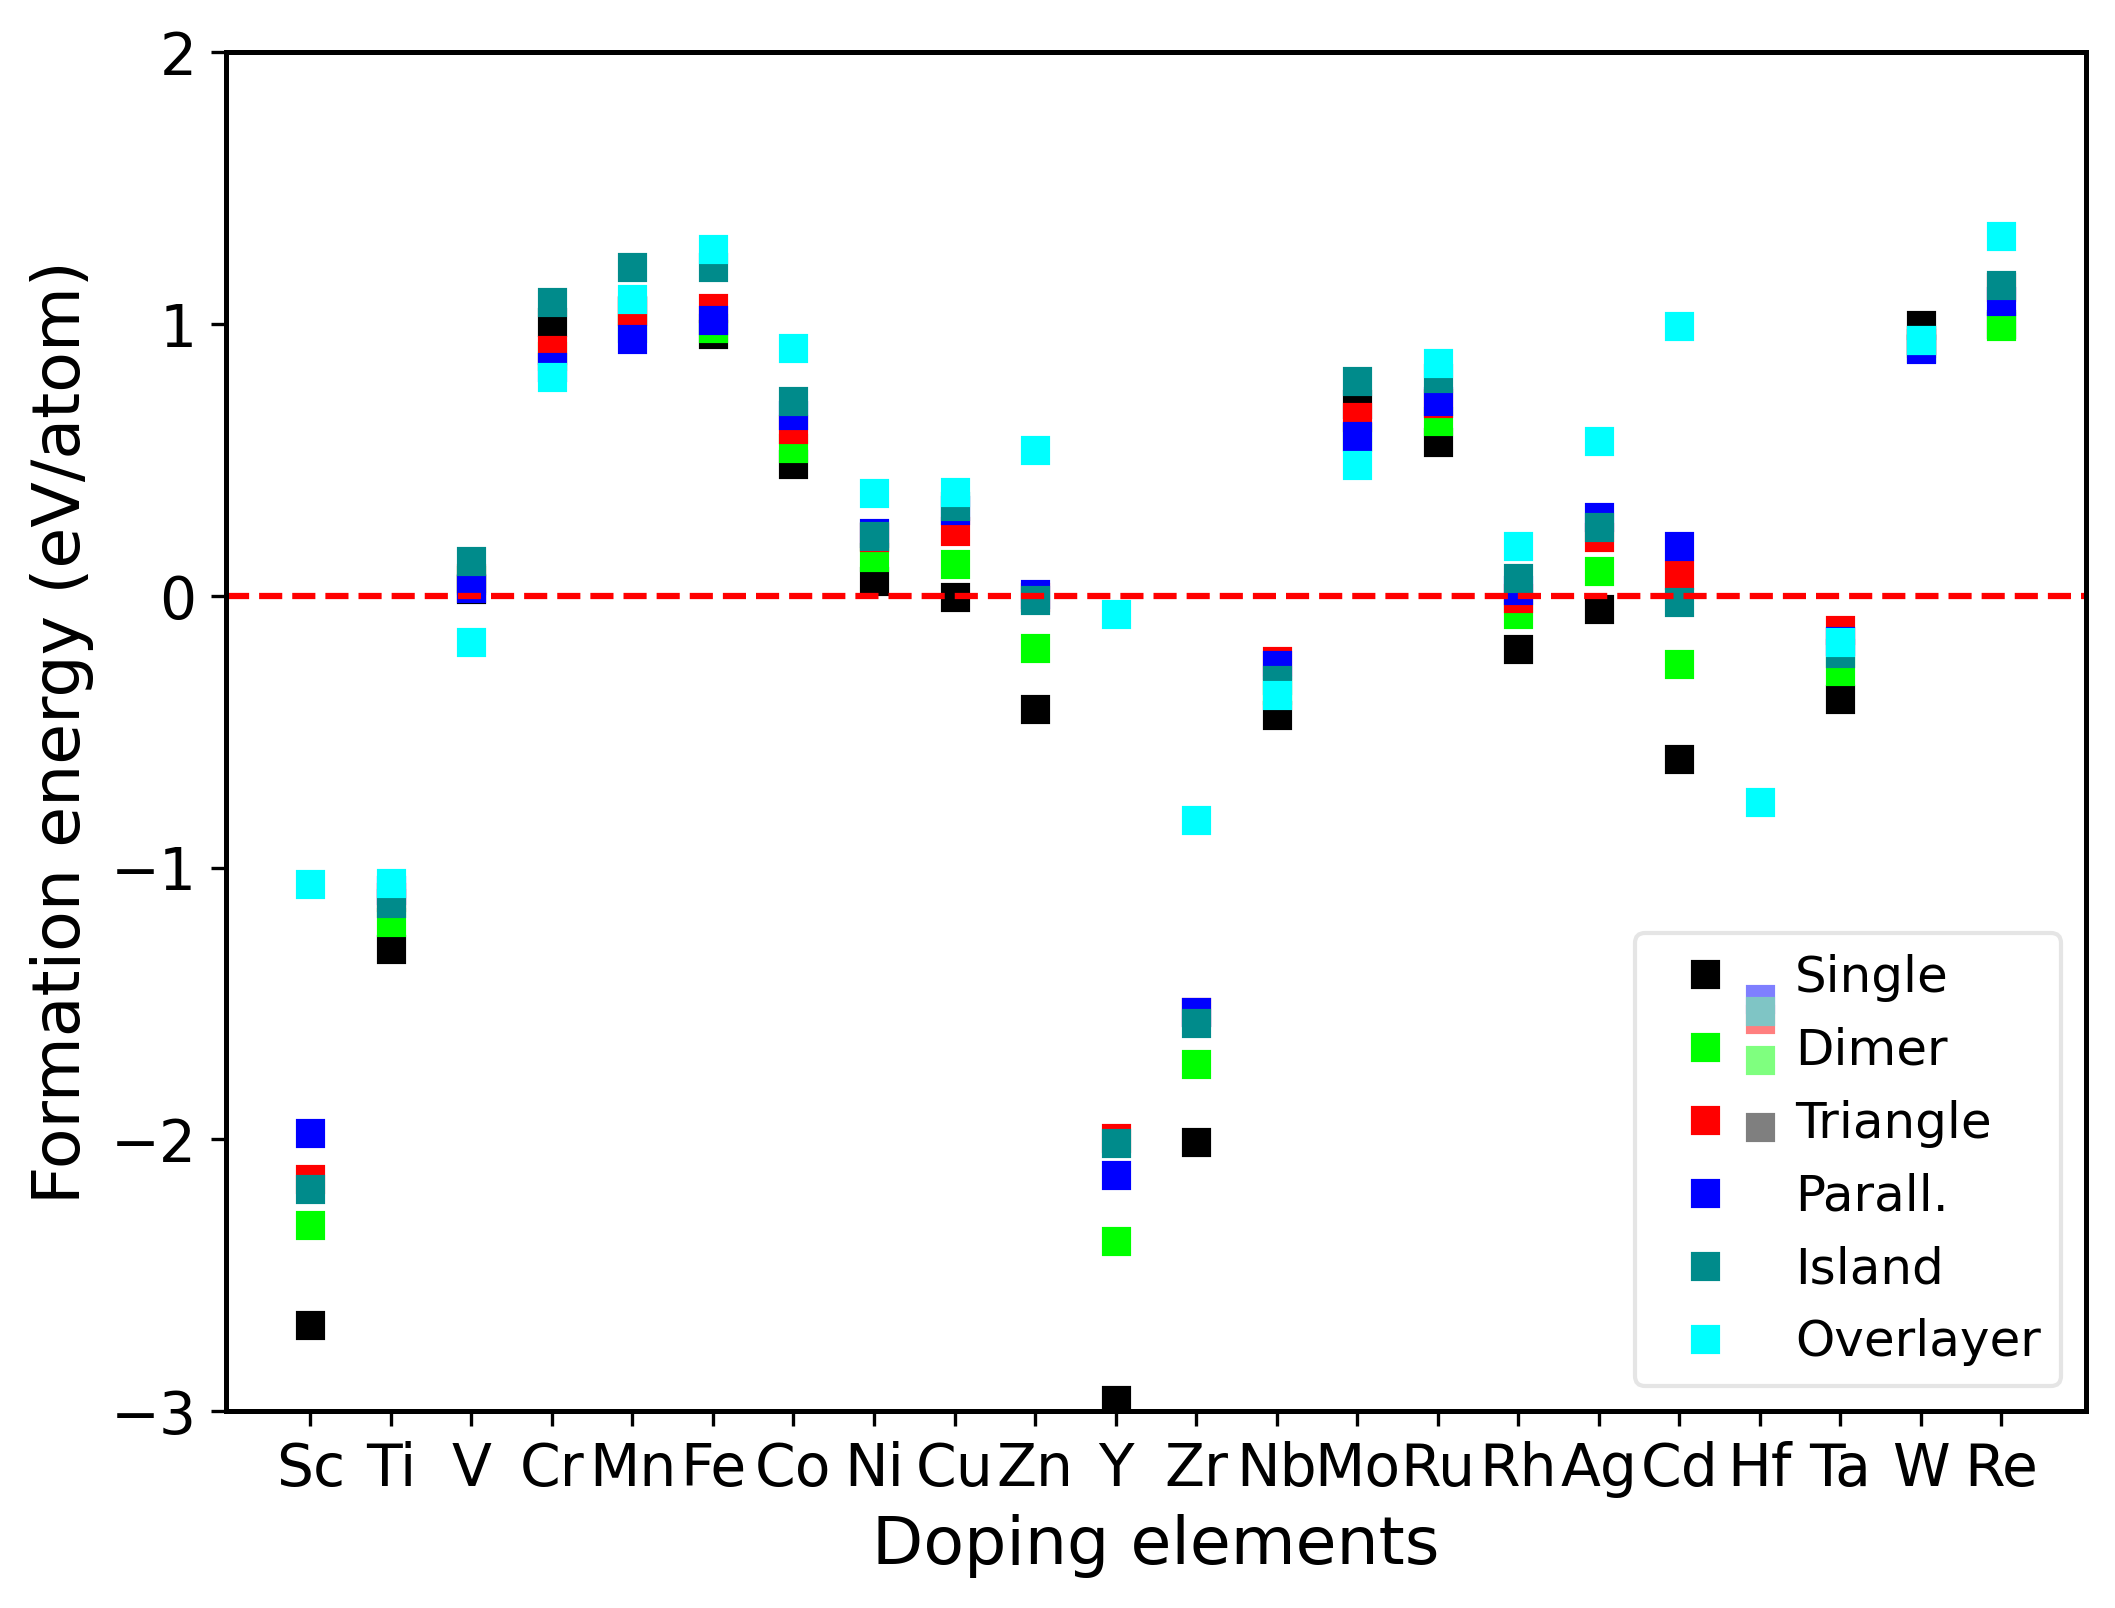

In [6]:
%matplotlib inline
from plotpackage.lib.io import read_excel, read_csv
from plotpackage.lib.figsmetadata import FigsMetaData
import matplotlib.pyplot as plt
import numpy as np

filename = './sites.xlsx'
#change it for excel and csv; ignore sheet, min_row, max_row, row_of_tag and col_of_ini_tag for csv
min_col = 1+14 #1st column in excel
max_col = 7+14 #5th column in excel

#change it only for excel
# sheet = 'Selectivity' #Sheet1 by defaut
sheet = 'stability' #Sheet1 by defaut
min_row = 2 #1st column in excel
max_row = 24 #9st column in excel

#saved figure name
figName1 = './paper1/Formation_energy.jpg'  #free energy diagram name

############ plot free energy diagram ###############
colorList = ['k', 'lime', 'r', 'b', 'darkcyan', 'cyan', 'olive', 'magenta', 'pink', 'gray', 'orange', 'purple', 'g']
typeNames, observationName, X = read_excel(filename, sheet, min_col, max_col, min_row, max_row) #load excel data
#stepsNames, observationName, X = read_csv(filename, , min_col, max_col) #load csv data

fig = plt.figure(figsize=(8, 6), dpi = 300)
x = np.arange(0,len(observationName),1)

marker = ['o', '^', '<', '>', 'v', 's', 'd', '.', ',', 'x', '+']
for i in range(len(typeNames)):    
    plt.plot(x, X[:,i], 's', color=colorList[i])  #plot dots
    # plt.plot(x, X[:,i], marker[i], color=colorList[i])  #plot dots
typeNames = ['Single', 'Dimer', 'Triangle', 'Parall.', 'Island', 'Overlayer']    
plt.legend(typeNames, framealpha=0.5, fontsize=12)
plt.axhline(y=0, color='r', linestyle='--')

# plt.xlim([-10, 8])
plt.ylim([-3., 2])
plt.xlabel('Doping elements', fontsize=16)
plt.ylabel('Formation energy (eV/atom)', fontsize=16)
# plt.ylabel('ΔG(HOCO*)-ΔG(H*)', fontsize=16)
# plt.title(sheet, fontsize=16)
ax = fig.gca()
ax.set_xticks(x)
ax.set_xticklabels(observationName)

ax.tick_params(labelsize=14) #tick label font size
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.2) #linewith of frame
plt.show()
fig.savefig(figName1, dpi=300, bbox_inches='tight')


# #add metadata into pictures
# figNames = [figName1]
# fmd = FigsMetaData(figNames, filename, sheet, min_col, max_col, min_row, max_row)
# fmd.add_metadata()

# Scaling relation

r2: 0.4
r2: 0.17
r2: 0.36
r2: 0.61
r2: 0.51
r2: 0.63
r2: 0.24
r2: 0.31
r2: 0.32
r2: 0.41
r2: 0.87
r2: 0.86


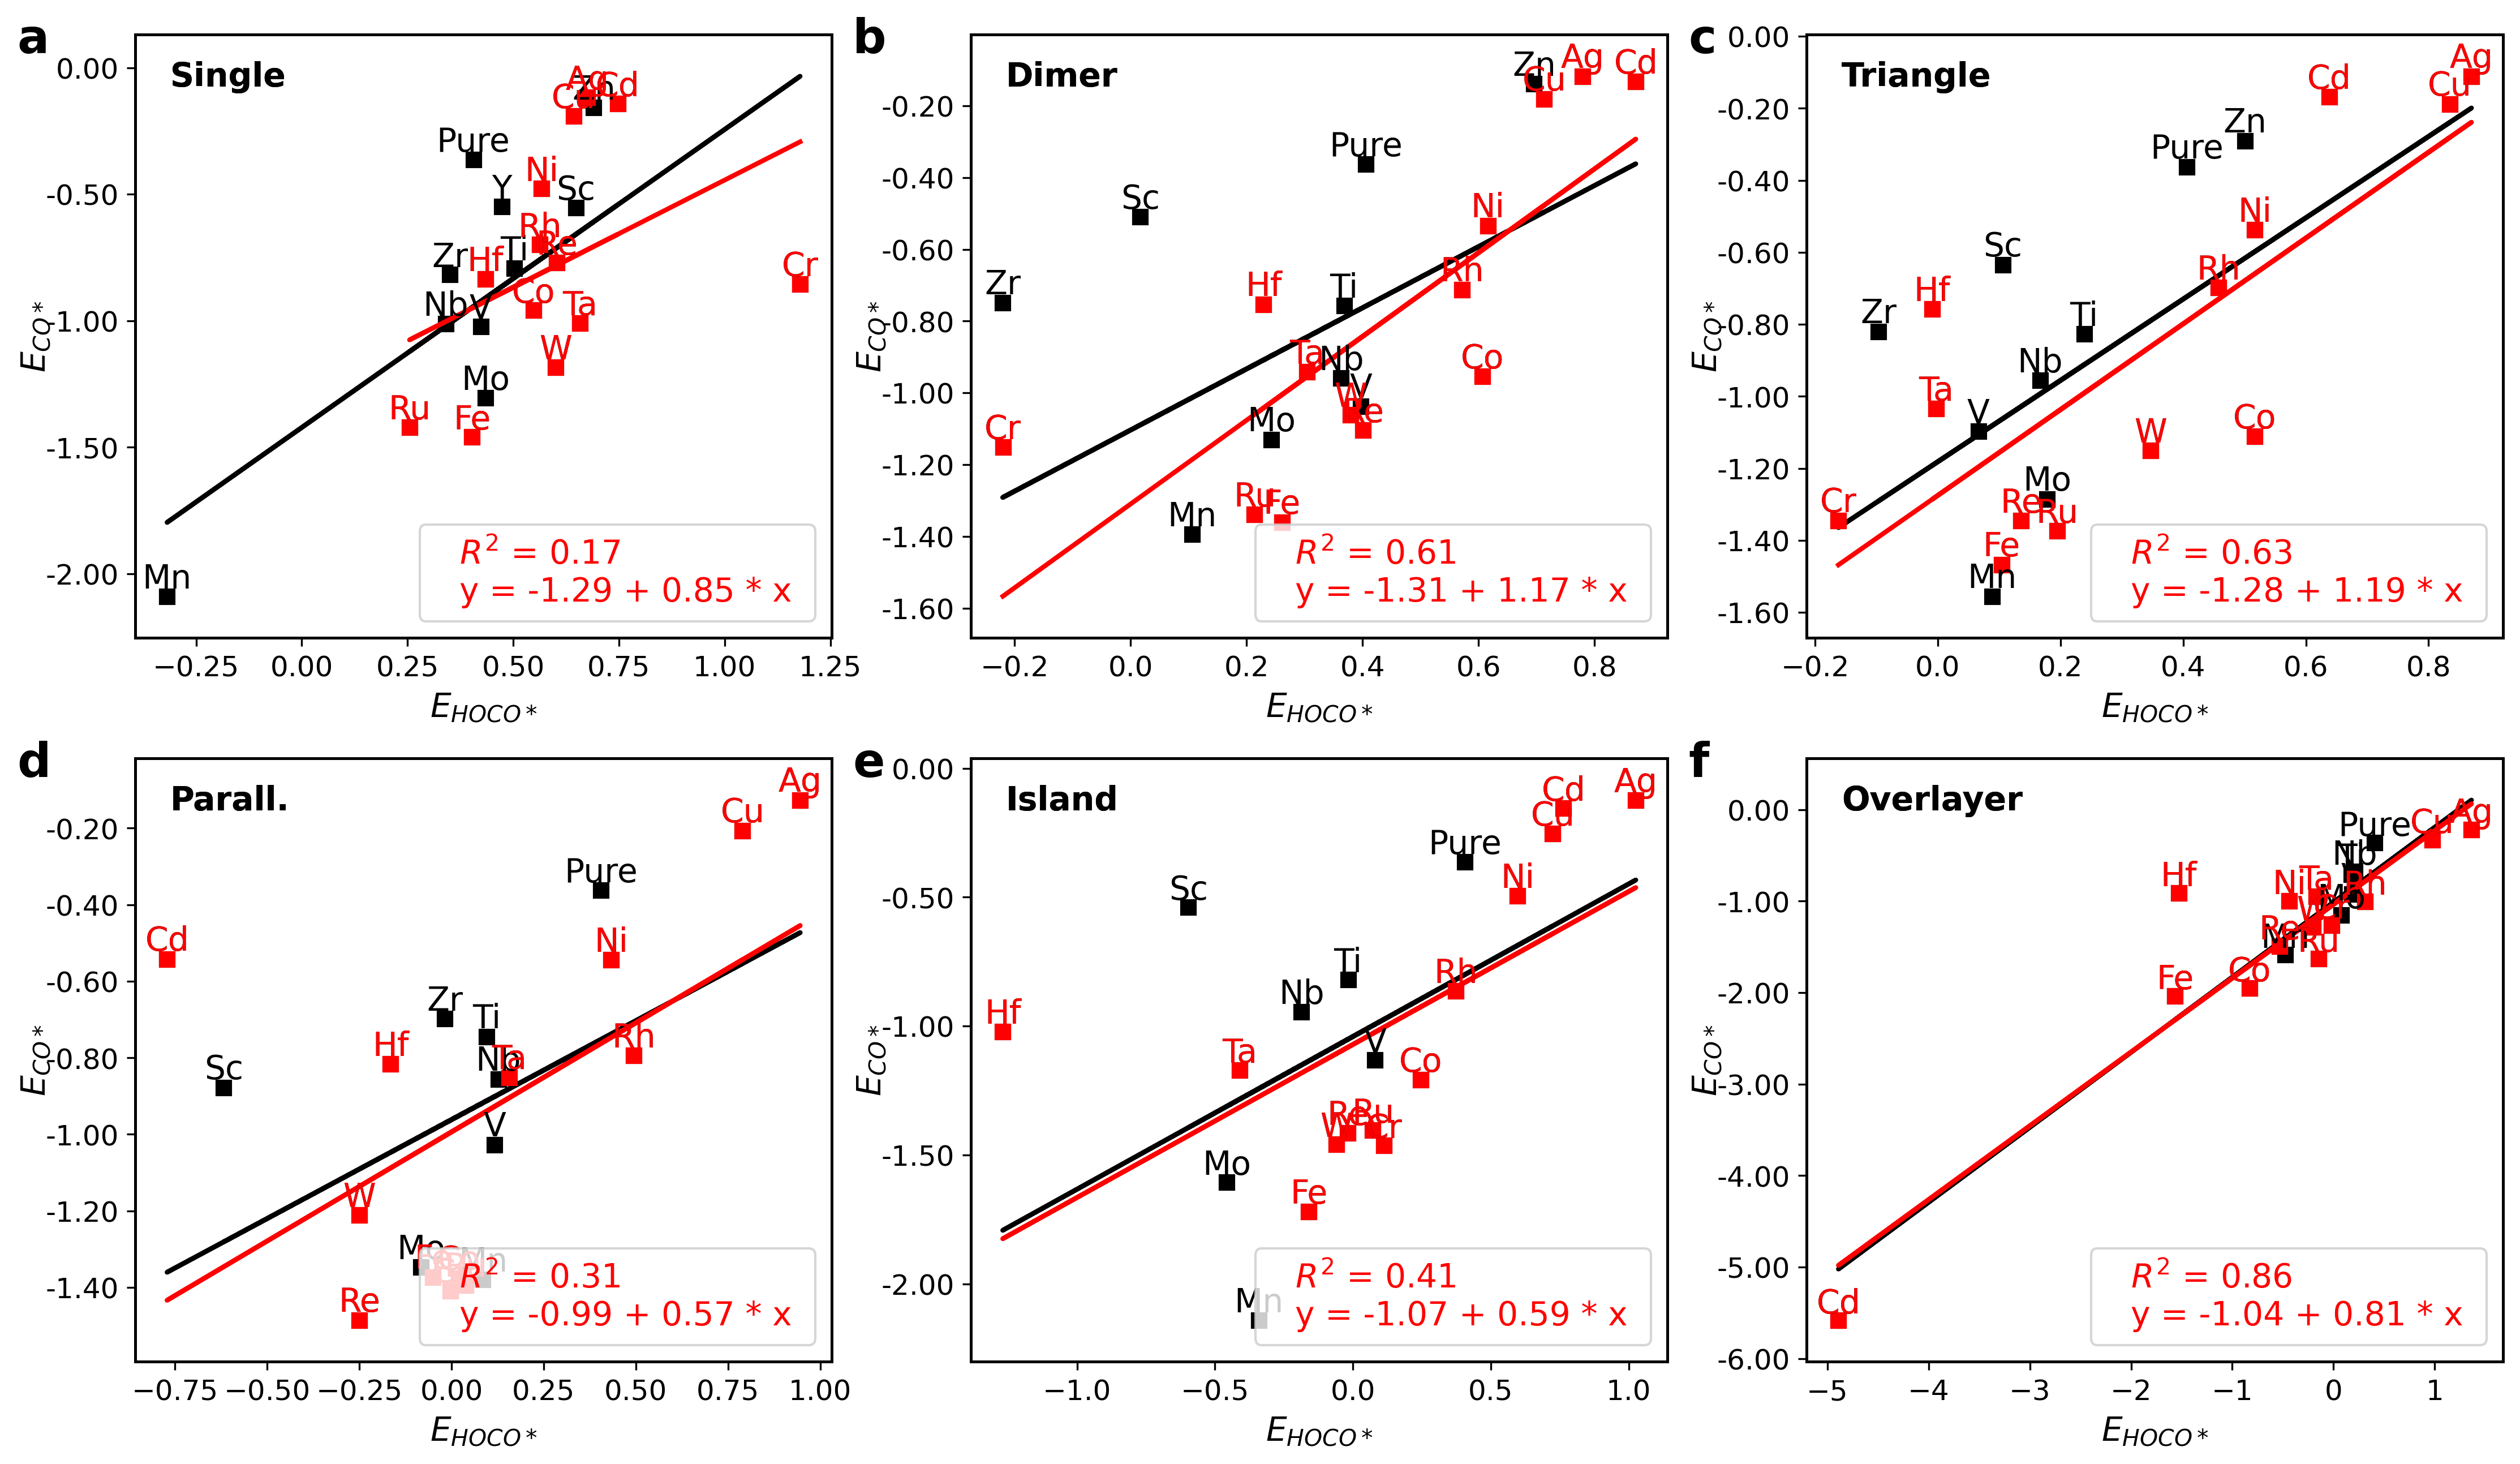

r2: 0.13
r2: 0.02
r2: 0.46
r2: 0.42
r2: 0.62
r2: 0.64
r2: 0.59
r2: 0.61
r2: 0.68
r2: 0.66
r2: 0.86
r2: 0.92


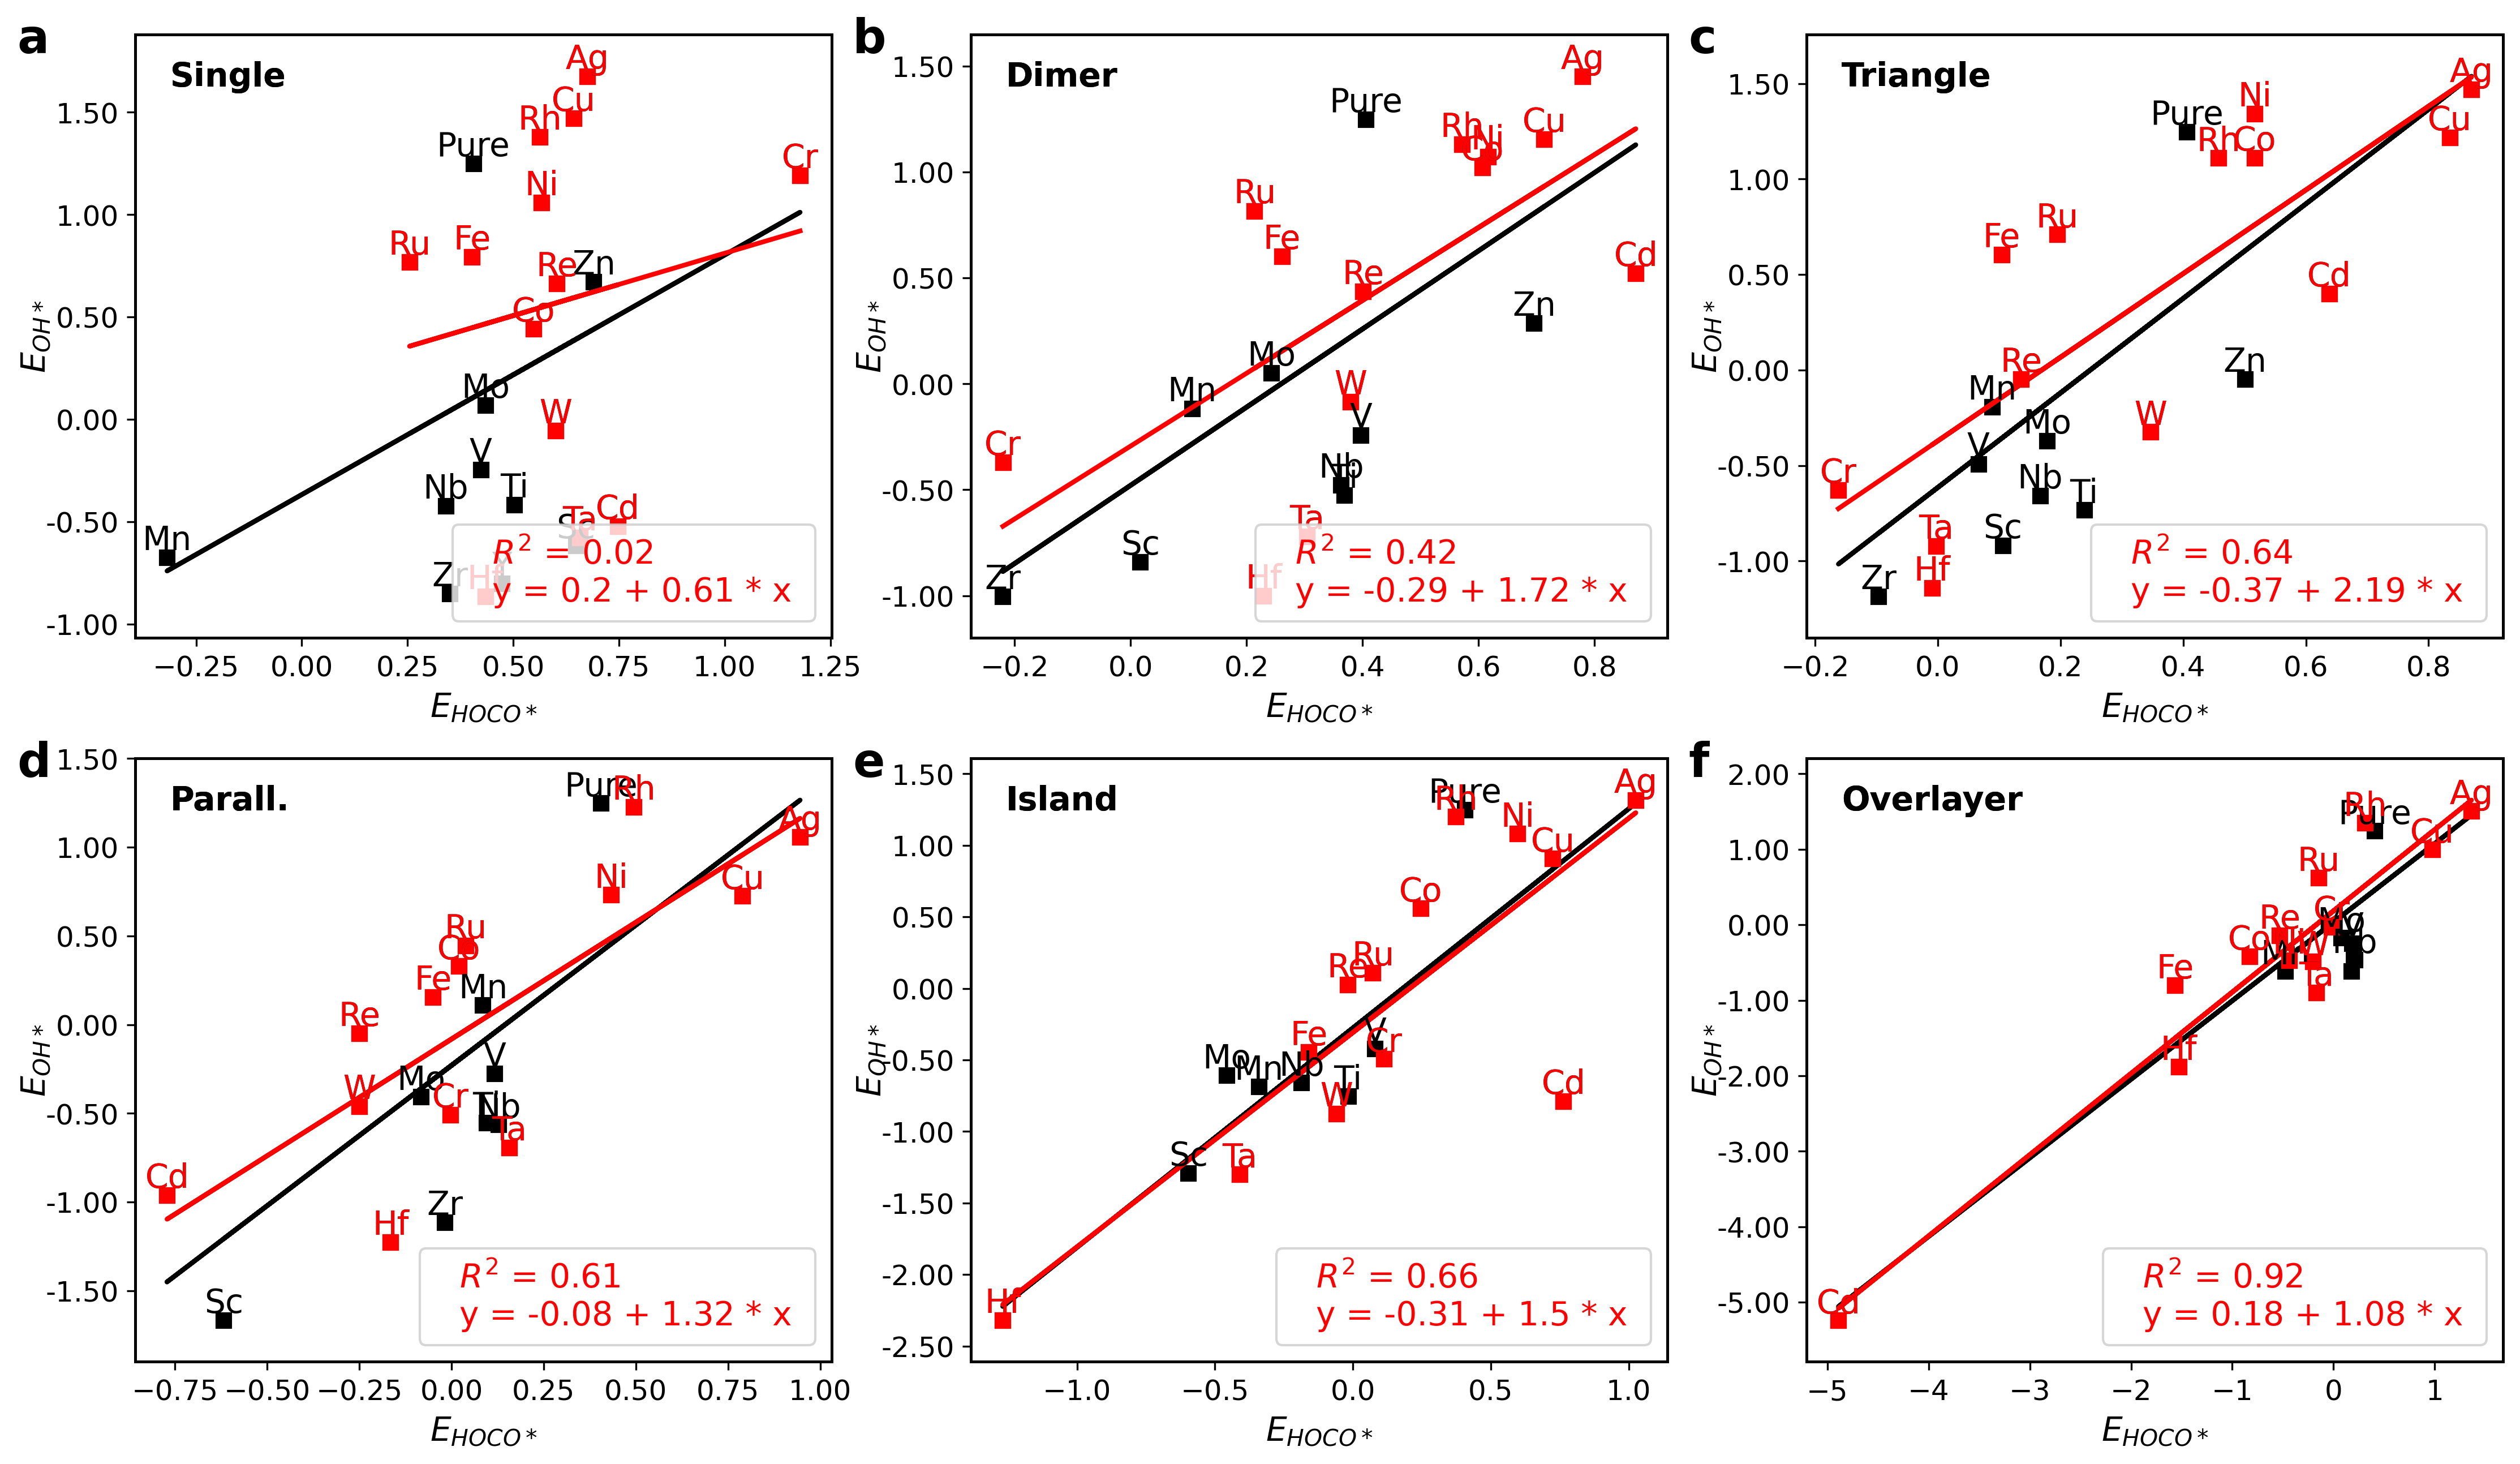

r2: 0.72
r2: 0.8
r2: 0.8
r2: 0.73
r2: 0.51
r2: 0.89


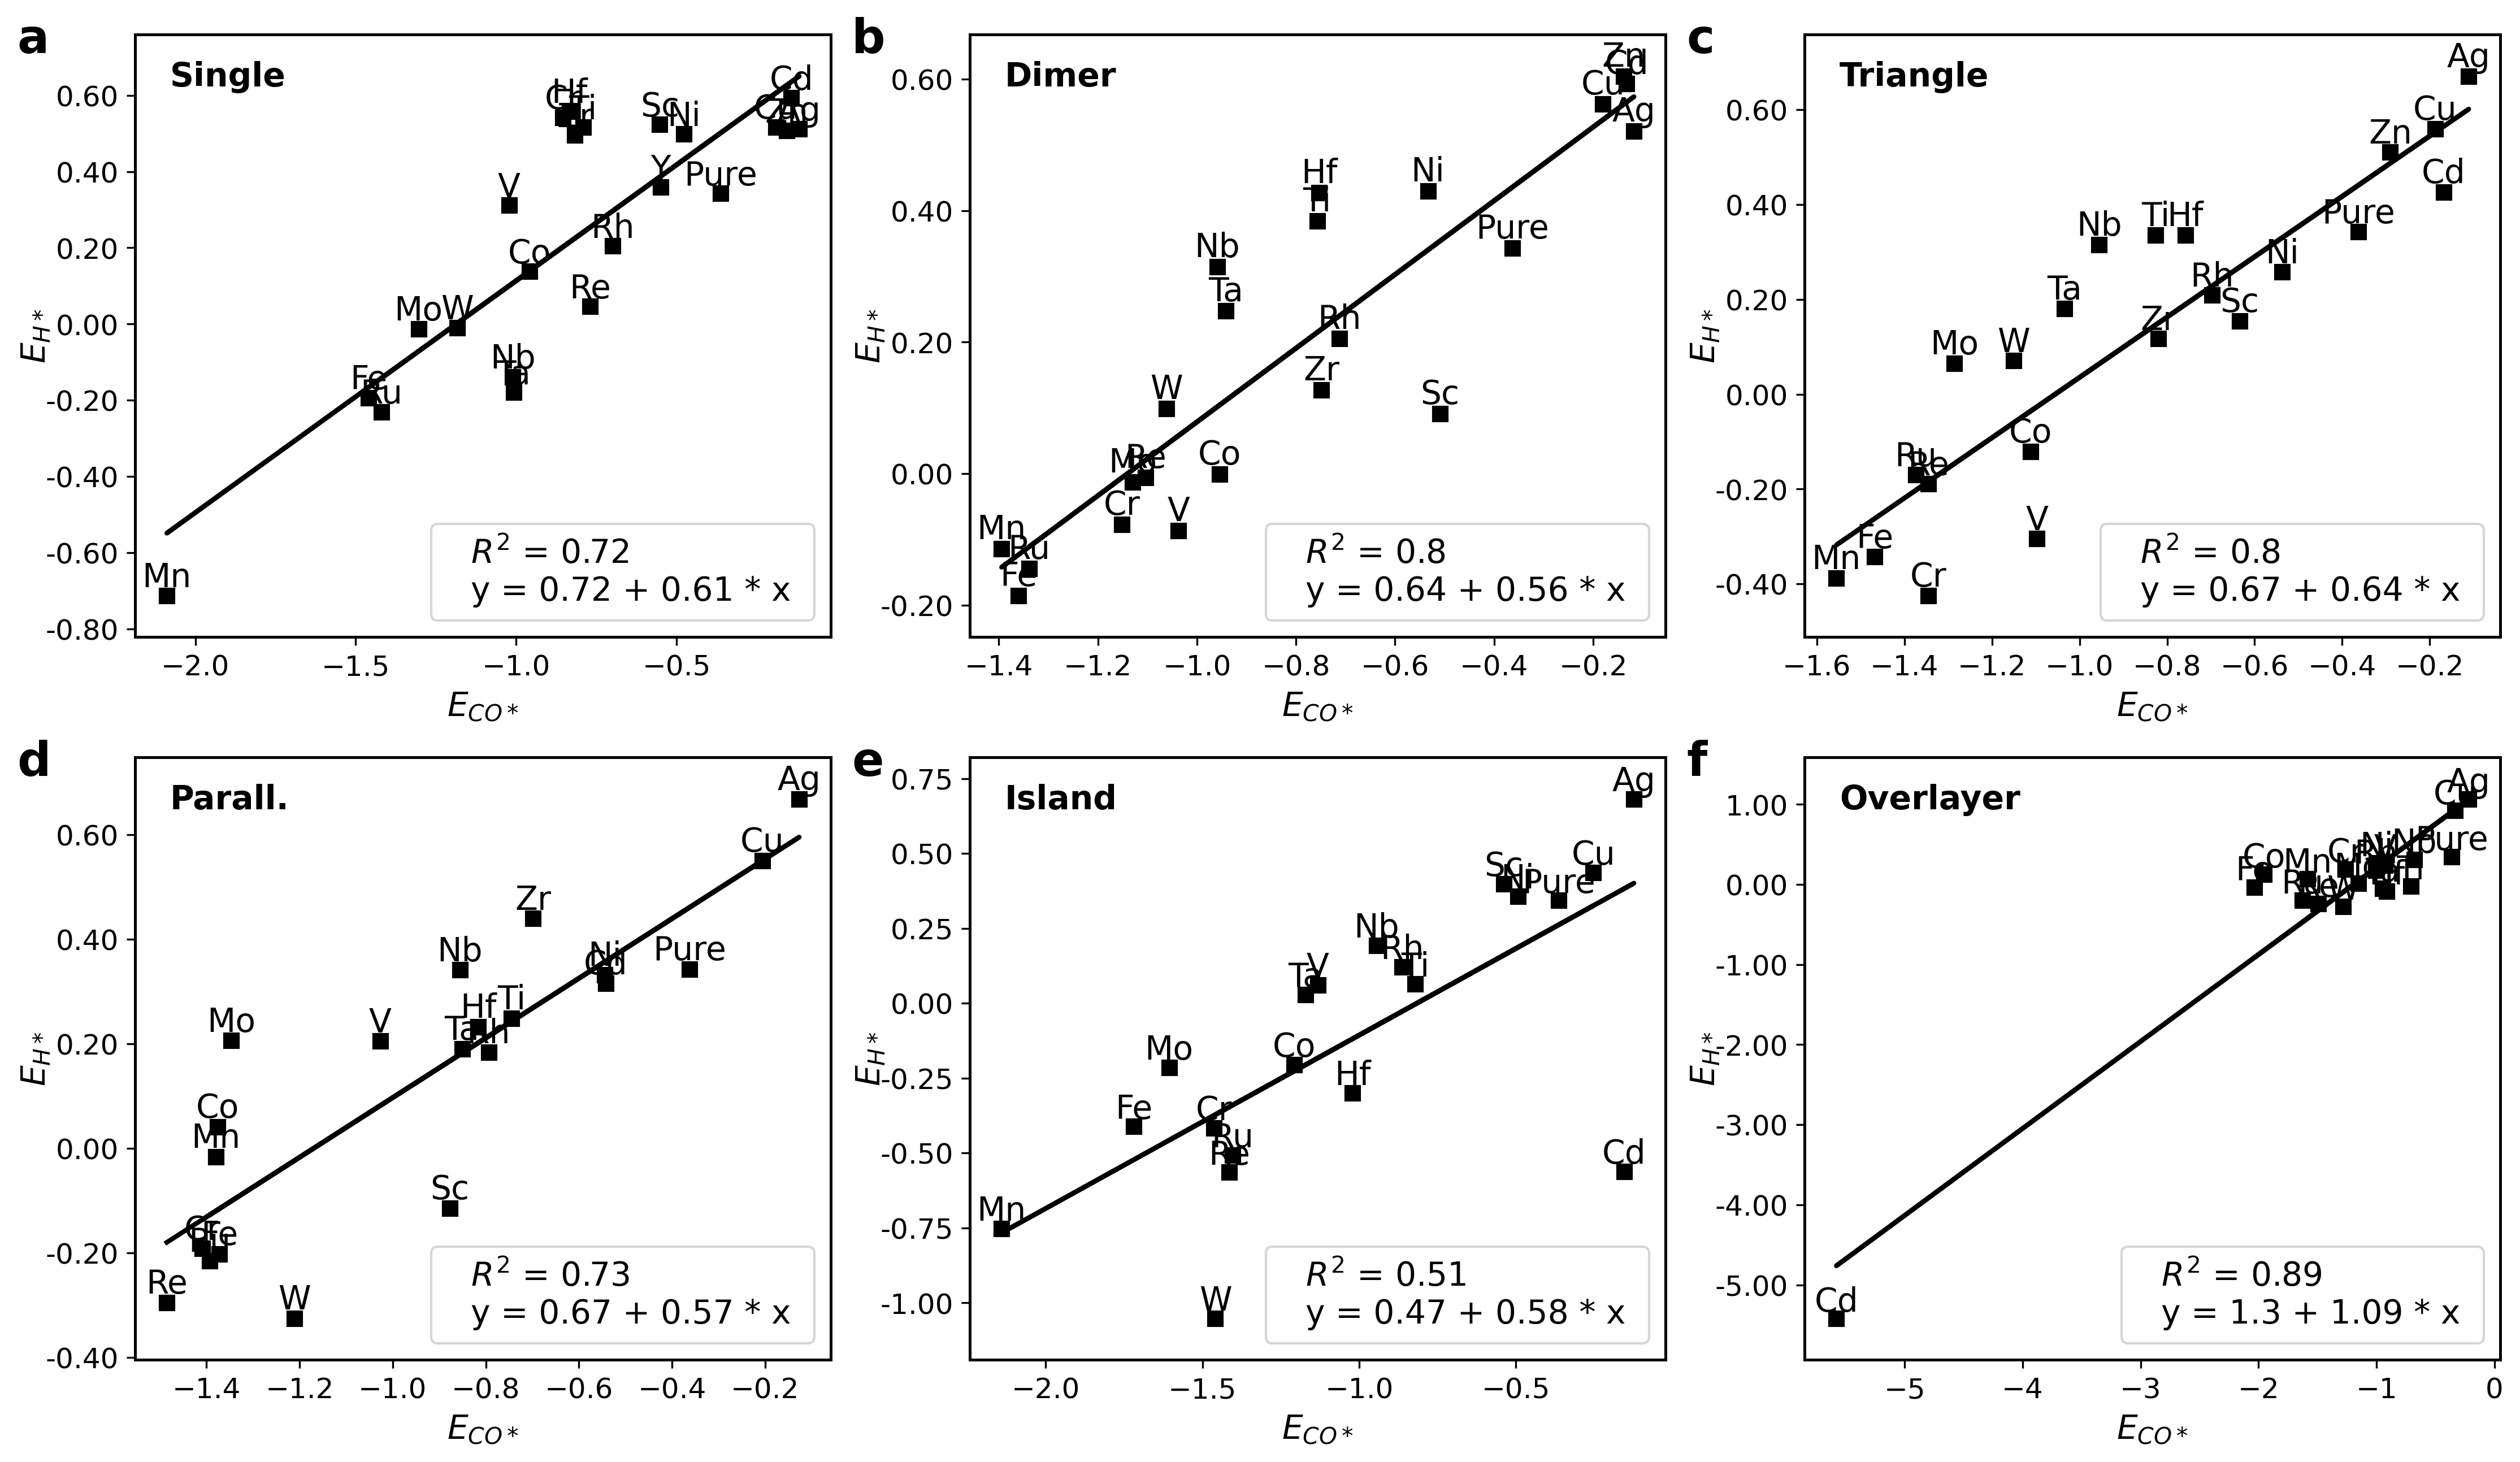

In [7]:
%matplotlib inline
import sys
sys.path.append("../../..")

from plotpackage.lib.io import read_excel, read_csv
from plotpackage.lib.CO2RR import CO2RRFEDplot
from plotpackage.lib.scalingrelation import ScalingRelationPlot
from plotpackage.lib.figsmetadata import FigsMetaData
import matplotlib.pyplot as plt
import numpy as np

# binding energy
filename = './sites.xlsx'
#change it for excel and csv; ignore sheet, min_row, max_row, row_of_tag and col_of_ini_tag for csv
min_col = 1+10 #1st column in excel
max_col = 5+10 #5th column in excel


# text = ['Near', 'Line', 'Triangle', 'Parall.', 'Island', 'Overlayer']
text = ['Single', 'Dimer', 'Triangle', 'Parall.', 'Island', 'Overlayer']
colx = [2, 2, 2, 3, 3, 5] #column in excel
coly = [3, 5, 4, 5, 4, 4] #column in excel
for index in [0, 1, 4]:
# for index in [0, 1, 2, 3, 4, 5]:
#     figName1 = './paper1/All_FreeEnergy_typesetting_{}.jpg'.format(index)  #free energy diagram name
    figName2 = './paper1/All_ScalingRelation_typesetting_{}.jpg'.format(index) #scaling reation figure name
    # col2=4 # column in excel
    col1=colx[index] # column in excel
    col2=coly[index] # column in excel
    col1 = col1 - 2
    col2 = col2 - 2
    i = 0
    fig = plt.figure(figsize=(18, 16), dpi = 300)
    for types in ['single_b', 'dimer_b', 'triangle_b', 'paral_b', 'island_b', 'overly_b']:
        #change it only for excel
        sheet = types #Sheet1 by defaut
        min_row = 1+1 #1st column in excel
        max_row = 24+1 #9st column in excel
        
        ############ plot free energy diagram ###############
        stepsNames, observationName, X = read_excel(filename, sheet, min_col, max_col, min_row, max_row) #load excel data
        #stepsNames, observationName, X = read_csv(filename, , min_col, max_col) #load csv data
        
        # # del rows; delete according to element names in excel
        del_ele = []
        # if types == 'top-new':
        #     del_ele = [] #remove distortion for near
        # if types == 'near-new':
        #     del_ele = ['Fe', 'Ru', 'Zr', 'Y', 'Mn', 'Nb', 'Zn' ] #remove distortion for near
        # elif types == 'line':
        #     del_ele = ['Ag', 'Y'] #remove distortion for line
        # elif types == 'triangle':
        #     del_ele = ['Y',] #remove distortion for triangle
        # elif types == 'paral-new':
        #     del_ele = ['Zn', 'Y', 'Zr'] #remove distortion for line
        # elif types == 'island-new':
        #     del_ele = ['Y', 'Zr',  'Zn'] #remove distortion for line
        # elif types == 'overly-new':
        #     del_ele = ['Sc', 'Zn', 'Y', 'Zr'] #remove distortion for line
        # if types == 'near-new':
        #     del_ele = ['Fe', 'Ru', 'Zr', 'Y', 'Mn', 'Nb', 'Zn' ] #remove distortion for near
        
        # #choose some rows
        # # selected_ele = ['Sc', 'Ti', 'V', 'Mn', 'Zn', 'Y', 'Zr', 'Nb', 'Mo'] #select according to element names in excel
        # selected_ele = ['Ti', 'Sc', 'Nb', 'Zr', 'Y', 'Zn', 'V', 'Mn', 'Mo', ] #select according to element names in excel
        # ranges = [observationName.index(each)+2 for each in selected_ele]
        # observationName = [observationName[i-2] for i in ranges]
        # selected_rows = [i-2 for i in ranges]
        # X = X[selected_rows,:]
        
        if types == 'single_b':
            del_ele = [] #remove distortion for near
        elif types == 'dimer_b':
            del_ele = ['Y', ] #remove distortion for line
        elif types == 'triangle_b':
            del_ele = ['Y',] #remove distortion for triangle
        elif types == 'paral_b':
            del_ele = ['Zn', 'Y',] #remove distortion for paral
        elif types == 'island_b':
            del_ele = ['Zn', 'Y', 'Zr'] #remove distortion for island
        elif types == 'overly_b':
            del_ele = ['Sc', 'Zn', 'Y', 'Zr'] #remove distortion for line
        # del_ele += ['Ti', 'Sc', 'Nb', 'Zr', 'Y', 'Zn', 'V', 'Mn', 'Mo', 'Pure'] #double bond and pure
        
         
        # dotColor = {'PdH': 'black', 'Pure': 'black', 'Pd': 'black', 'Sc': 'black', 'Ti': 'black', 'V': 'black', 
        #             'Mn': 'black', 'Fe': 'red', 'Co': 'red', 'Ni': 'red', 'Cu': 'red', 
        #             'Zn': 'black', 'Y': 'black', 'Zr': 'black', 'Nb': 'black', 'Mo': 'black', 'Ru': 'red',
        #             'Rh': 'red', 'Ag': 'red'}
        
        def delete(observationName, X, del_ele):
            del_rows = [observationName.index(each)+2 for each in del_ele]
            del_list = [x - 2 for x in del_rows]
            observationName = np.delete(observationName, del_list, 0)
            X = np.delete(X, del_list, 0)     
            descriper1 = (X[:, col1]).astype(float) 
            descriper2 = (X[:, col2]).astype(float)
            return observationName, X, descriper1, descriper2
        
        observationName1, X1, descriper11, descriper12 = delete(observationName, X, del_ele)
        
        
        # del_rows = [observationName.index(each)+2 for each in del_ele]
        # del_list = [x - 2 for x in del_rows]
        # observationName = np.delete(observationName, del_list, 0)
        # X = np.delete(X, del_list, 0)     
        # descriper1 = (X[:, col1]).astype(float) 
        # descriper2 = (X[:, col2]).astype(float)
        
        # p = 0
        # for ii, each in enumerate(observationName):
        #     if each == 'Pd':
        #         p = ii
        # observationName[p] = 'Pure'
        # np.where(observationName=='Pd', "Pure", observationName)
        
        # for ii, each in enumerate(observationName):
        #     if each == 'Pd':
        #         observationName = observationName.replace("Pd", "Pure")
        # np.char.replace(observationName, 'Pd', 'Pure')
        ax = plt.subplot(3, 3, i + 1)  
        stepsNames = ['$E_{HOCO*}$', '$E_{CO*}$', '$E_{H*}$', '$E_{OH*}$']

        sr1 = ScalingRelationPlot(descriper11, descriper12, observationName1, figName2)   
        sr1.plot(ax = ax, save=False,  dotcolor='black', linecolor='black', title='', xlabel=stepsNames[col1], ylabel=stepsNames[col2], text=text[i])
        
        
        # plot single bond
        if index == 0 or index == 1:
            del_ele += ['Ti', 'Sc', 'Nb', 'Zr', 'Y', 'Zn', 'V', 'Mn', 'Mo', 'Pure'] #double bond and pure
            observationName2, X2, descriper21, descriper22 = delete(observationName, X, del_ele)
            sr2 = ScalingRelationPlot(descriper21, descriper22, observationName2, figName2)   
            sr2.plot(ax = ax, save=False,  dotcolor='red', linecolor='red', title='', xlabel=stepsNames[col1], ylabel=stepsNames[col2], text=text[i])
        
        import string
        ax.text(-0.17, 0.97, string.ascii_lowercase[i], transform=ax.transAxes, size=20, weight='bold')
        
        i = i +1
    plt.show()
    fig.savefig(figName2, dpi=300, bbox_inches='tight')
    print('===============================')

# Free energy diagram

auto loaded stepsName:  ['* + CO$_{2}$', 'HOCO*', 'CO*', '* + CO']
auto loaded obserName:  ['Pure' 'Sc' 'Ti' 'V' 'Cr' 'Mn' 'Fe' 'Co' 'Ni' 'Cu' 'Zn' 'Y' 'Zr' 'Nb'
 'Mo' 'Ru' 'Rh' 'Ag' 'Cd' 'Hf' 'Ta' 'W' 'Re']
auto loaded data: 
 [[ 0.          0.81967882  0.21640444  0.123     ]
 [ 0.          1.06229848  0.02627234  0.123     ]
 [ 0.          0.91652427 -0.21296131  0.123     ]
 [ 0.          0.83742687 -0.44339307  0.123     ]
 [ 0.          1.59252365 -0.2751155   0.123     ]
 [ 0.          0.09530395 -1.5095998   0.123     ]
 [ 0.          0.81654067 -0.8805081   0.123     ]
 [ 0.          0.96208848 -0.37966808  0.123     ]
 [ 0.          0.98129886  0.1010938   0.123     ]
 [ 0.          1.05662297  0.38825929  0.123     ]
 [ 0.          1.10450544  0.42185297  0.123     ]
 [ 0.          0.88707647  0.02918829  0.123     ]
 [ 0.          0.76403078 -0.23806156  0.123     ]
 [ 0.          0.75452582 -0.43206613  0.123     ]
 [ 0.          0.84856946 -0.72525127  0.123     ]
 [ 0.  

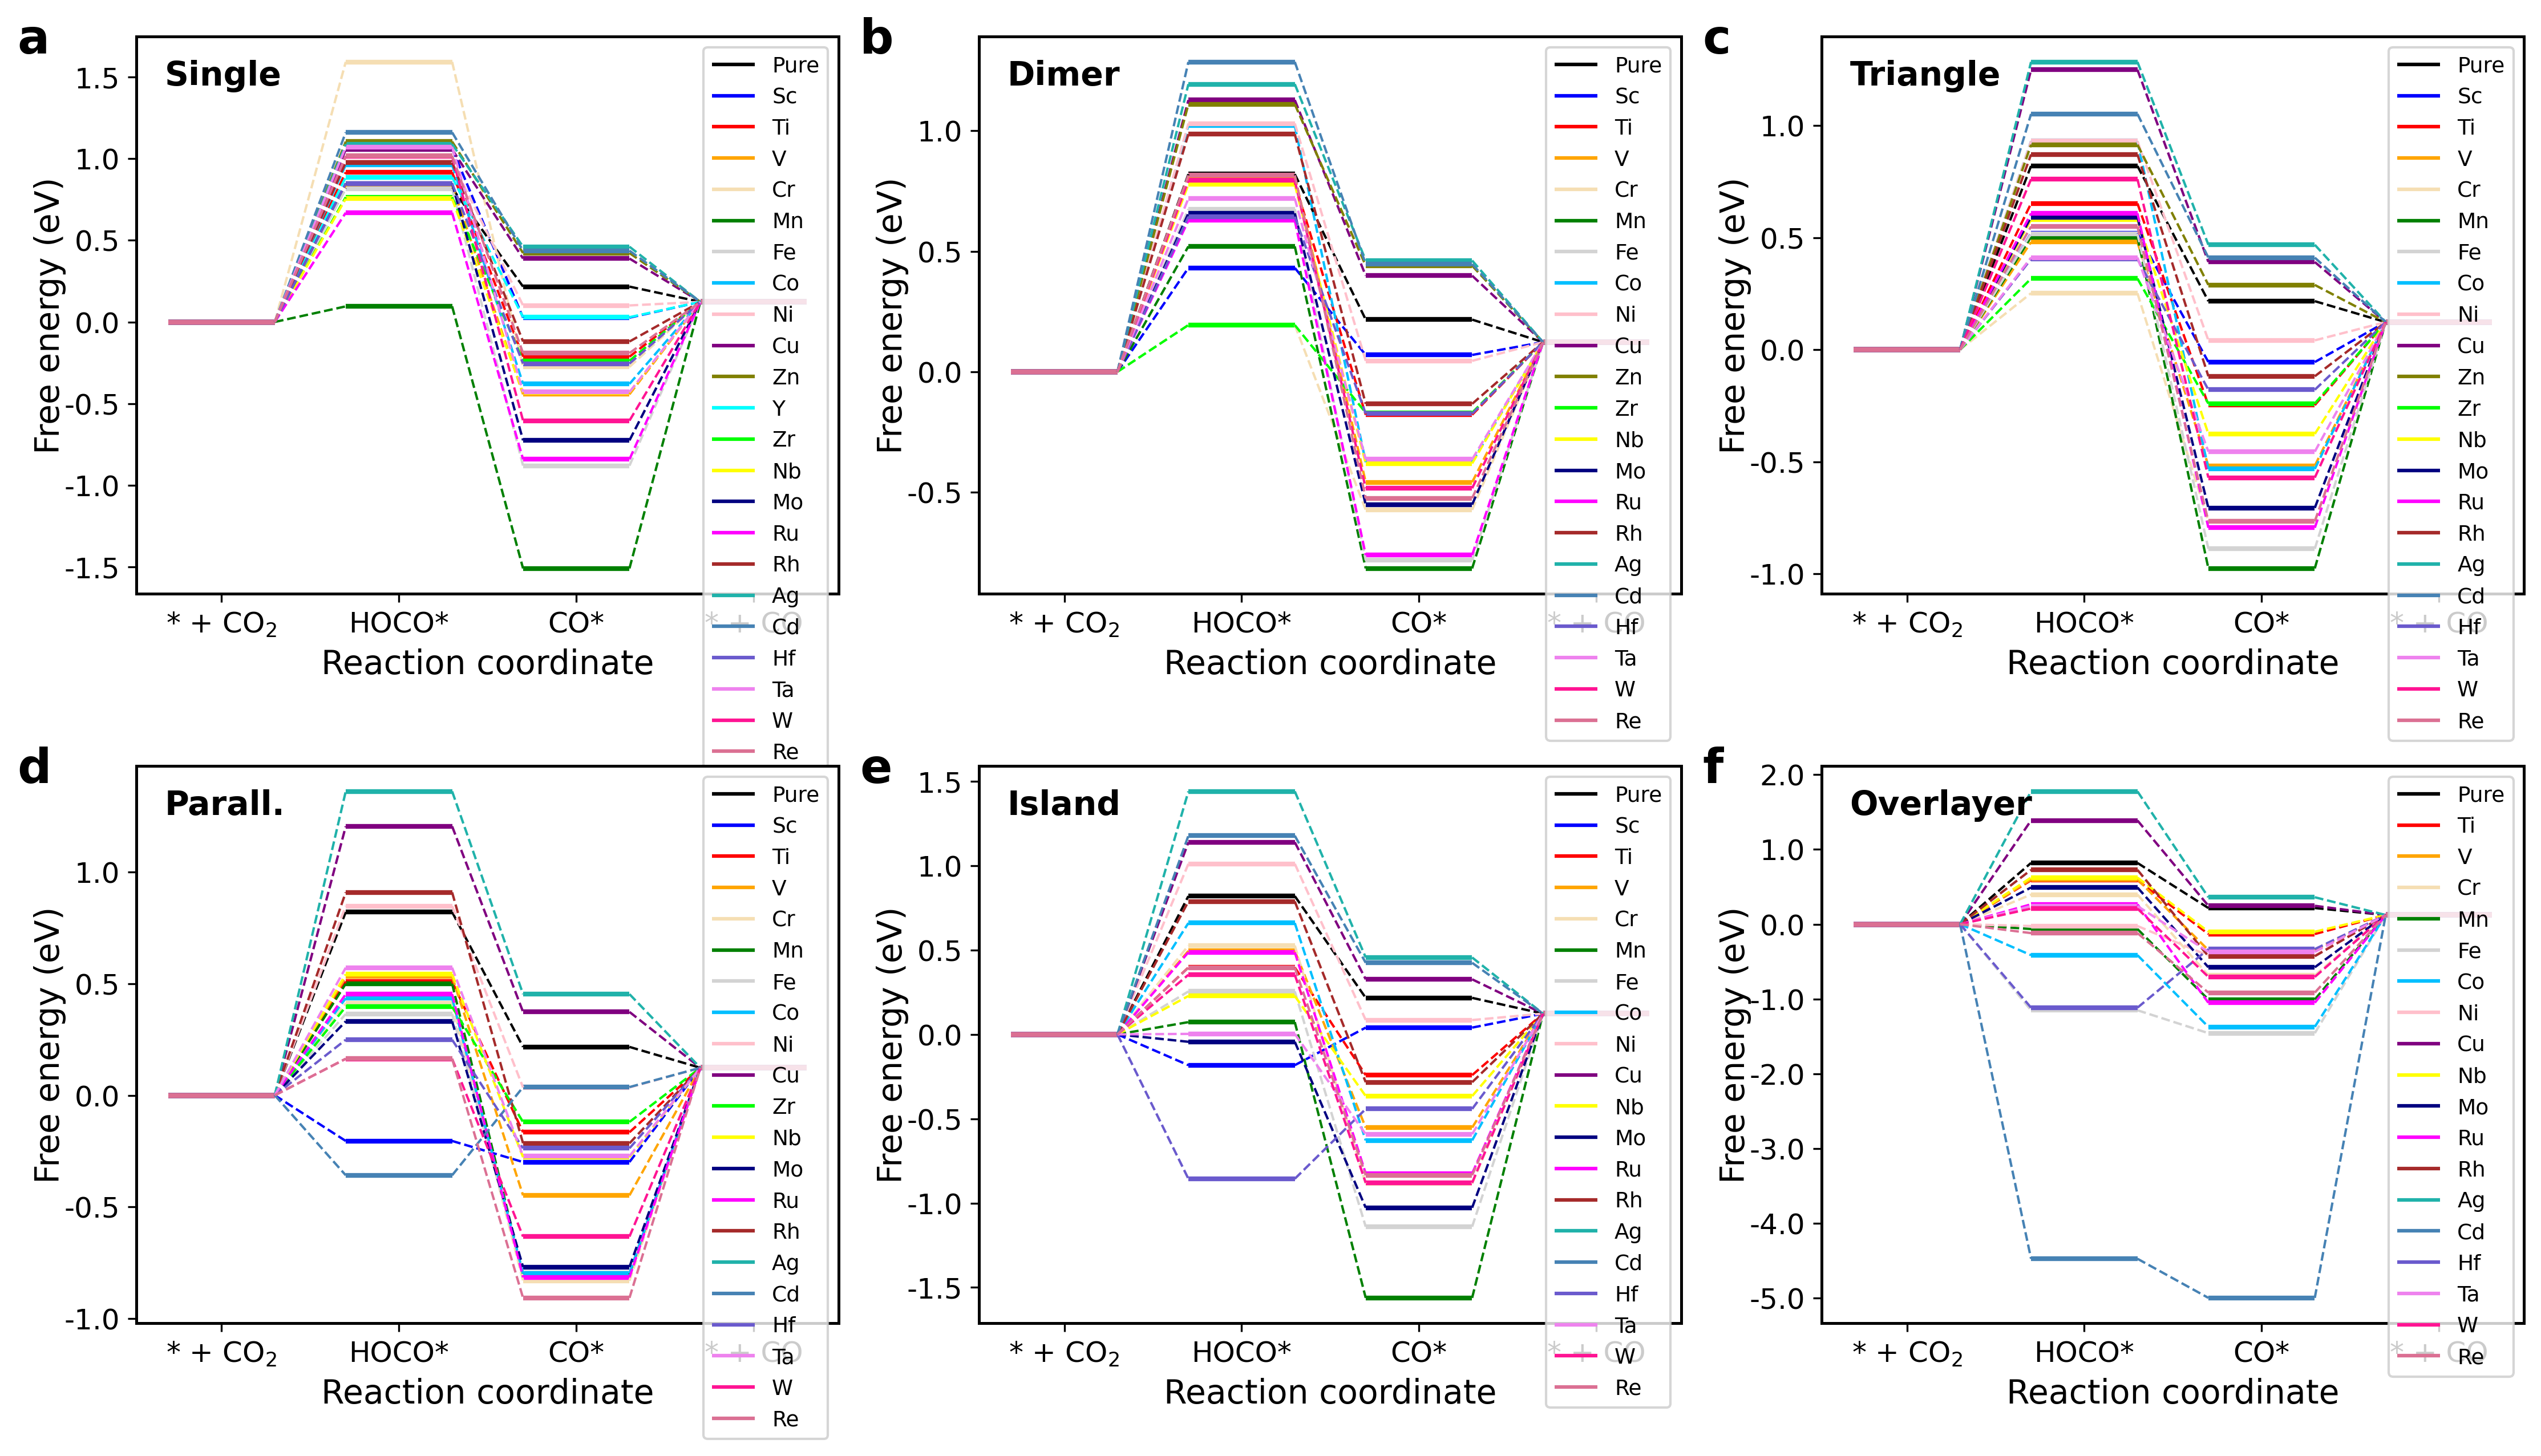

In [1]:
%matplotlib inline
import sys
sys.path.append("../../..")

from plotpackage.lib.io import read_excel, read_csv
from plotpackage.lib.CO2RR import CO2RRFEDplot
from plotpackage.lib.scalingrelation import ScalingRelationPlot
from plotpackage.lib.figsmetadata import FigsMetaData
import matplotlib.pyplot as plt
import numpy as np

filename = './sites.xlsx'
#change it for excel and csv; ignore sheet, min_row, max_row, row_of_tag and col_of_ini_tag for csv
min_col = 1+18 #1st column in excel
max_col = 5+18 #5th column in excel

#saved figure name
figName1 = './paper1/All_FreeEnergy_typesetting.jpg'  #free energy diagram name
# figName2 = './paper1//ScalingRelation_typesetting.jpg' #scaling reation figure name

i = 0
fig = plt.figure(figsize=(18, 16), dpi = 300)
text = ['Single', 'Dimer', 'Triangle', 'Parall.', 'Island', 'Overlayer']
# col1 = [2, 2, 2, 3, 3, 5] #column in excel
# col2 = [3, 5, 4, 5, 4, 4] #column in excel
# col1=2 # column in excel
# col2=5 # column in excel
# col1 = col1 - 2
# col2 = col2 - 2
for types in ['single_b', 'dimer_b', 'triangle_b', 'paral_b', 'island_b', 'overly_b']:
    #change it only for excel
    sheet = types #Sheet1 by defaut
    min_row = 1+1 #1st column in excel
    max_row = 24+1 #9st column in excel
    
    ############ plot free energy diagram ###############
    stepsNames, observationName, X = read_excel(filename, sheet, min_col, max_col, min_row, max_row) #load excel data
    #stepsNames, observationName, X = read_csv(filename, , min_col, max_col) #load csv data
    
    # # del rows; delete according to element names in excel
    del_ele = []
    # if types == 'top-new':
    #     del_ele = [] #remove distortion for near
    # if types == 'near-new':
    #     del_ele = ['Fe', 'Ru', 'Zr', 'Y', 'Mn', 'Nb', 'Zn' ] #remove distortion for near
    # elif types == 'line':
    #     del_ele = ['Ag', 'Y'] #remove distortion for line
    # elif types == 'triangle':
    #     del_ele = ['Y',] #remove distortion for triangle
    # elif types == 'paral-new':
    #     del_ele = ['Zn', 'Y', 'Zr'] #remove distortion for line
    # elif types == 'island-new':
    #     del_ele = ['Y', 'Zr', 'Sc', 'Zn'] #remove distortion for line
    # elif types == 'overly-new':
    #     del_ele = ['Sc', 'Zn', 'Y', 'Zr', 'Fe'] #remove distortion for line
    
    # if types == 'near-new':
    #     del_ele = ['Fe', 'Ru', 'Zr', 'Y', 'Mn', 'Nb', 'Zn' ] #remove distortion for near
    if types == 'single_b':
            del_ele = [] #remove distortion for near
    elif types == 'dimer_b':
        del_ele = ['Y', ] #remove distortion for line
    elif types == 'triangle_b':
        del_ele = ['Y',] #remove distortion for triangle
    elif types == 'paral_b':
        del_ele = ['Zn', 'Y',] #remove distortion for paral
    elif types == 'island_b':
        del_ele = ['Zn', 'Y', 'Zr'] #remove distortion for island
    elif types == 'overly_b':
        del_ele = ['Sc', 'Zn', 'Y', 'Zr'] #remove distortion for line
        

    del_rows = [observationName.index(each)+2 for each in del_ele]
    ### del_rows = [10, 12, 13, 18]  #delete according to rows in excel
    del_list = [x - 2 for x in del_rows]
    observationName = np.delete(observationName, del_list, 0)
    X = np.delete(X, del_list, 0)
    
    M  = 3
    ax = plt.subplot(3, 3, i + 1)
    
#     descriper1 = (X[:, col1]).astype(float) 
#     descriper2 = (X[:, col2]).astype(float) 
    # sr = ScalingRelationPlot(descriper1, descriper2, observationName, figName2)   
    # sr.plot(ax = ax, save=False, title='', xlabel=stepsNames[col1], ylabel=stepsNames[col2], text=text[i])
    stepsNames = ['* + CO$_{2}$', 'HOCO*', 'CO*', '* + CO']  #reload step name for CO2RR
    
    CO2RRdiagram = CO2RRFEDplot(stepsNames, observationName, X, figName1)
    CO2RRdiagram.plot(ax = ax, title='', save=False, legandSize = 9., text = text[i], ratio=1.4)
    
    import string
    ax.text(-0.17, 0.97, string.ascii_lowercase[i], transform=ax.transAxes, size=20, weight='bold')
    
    i = i +1
    
plt.show()
fig.savefig(figName1, dpi=300, bbox_inches='tight')

# Volcano plot

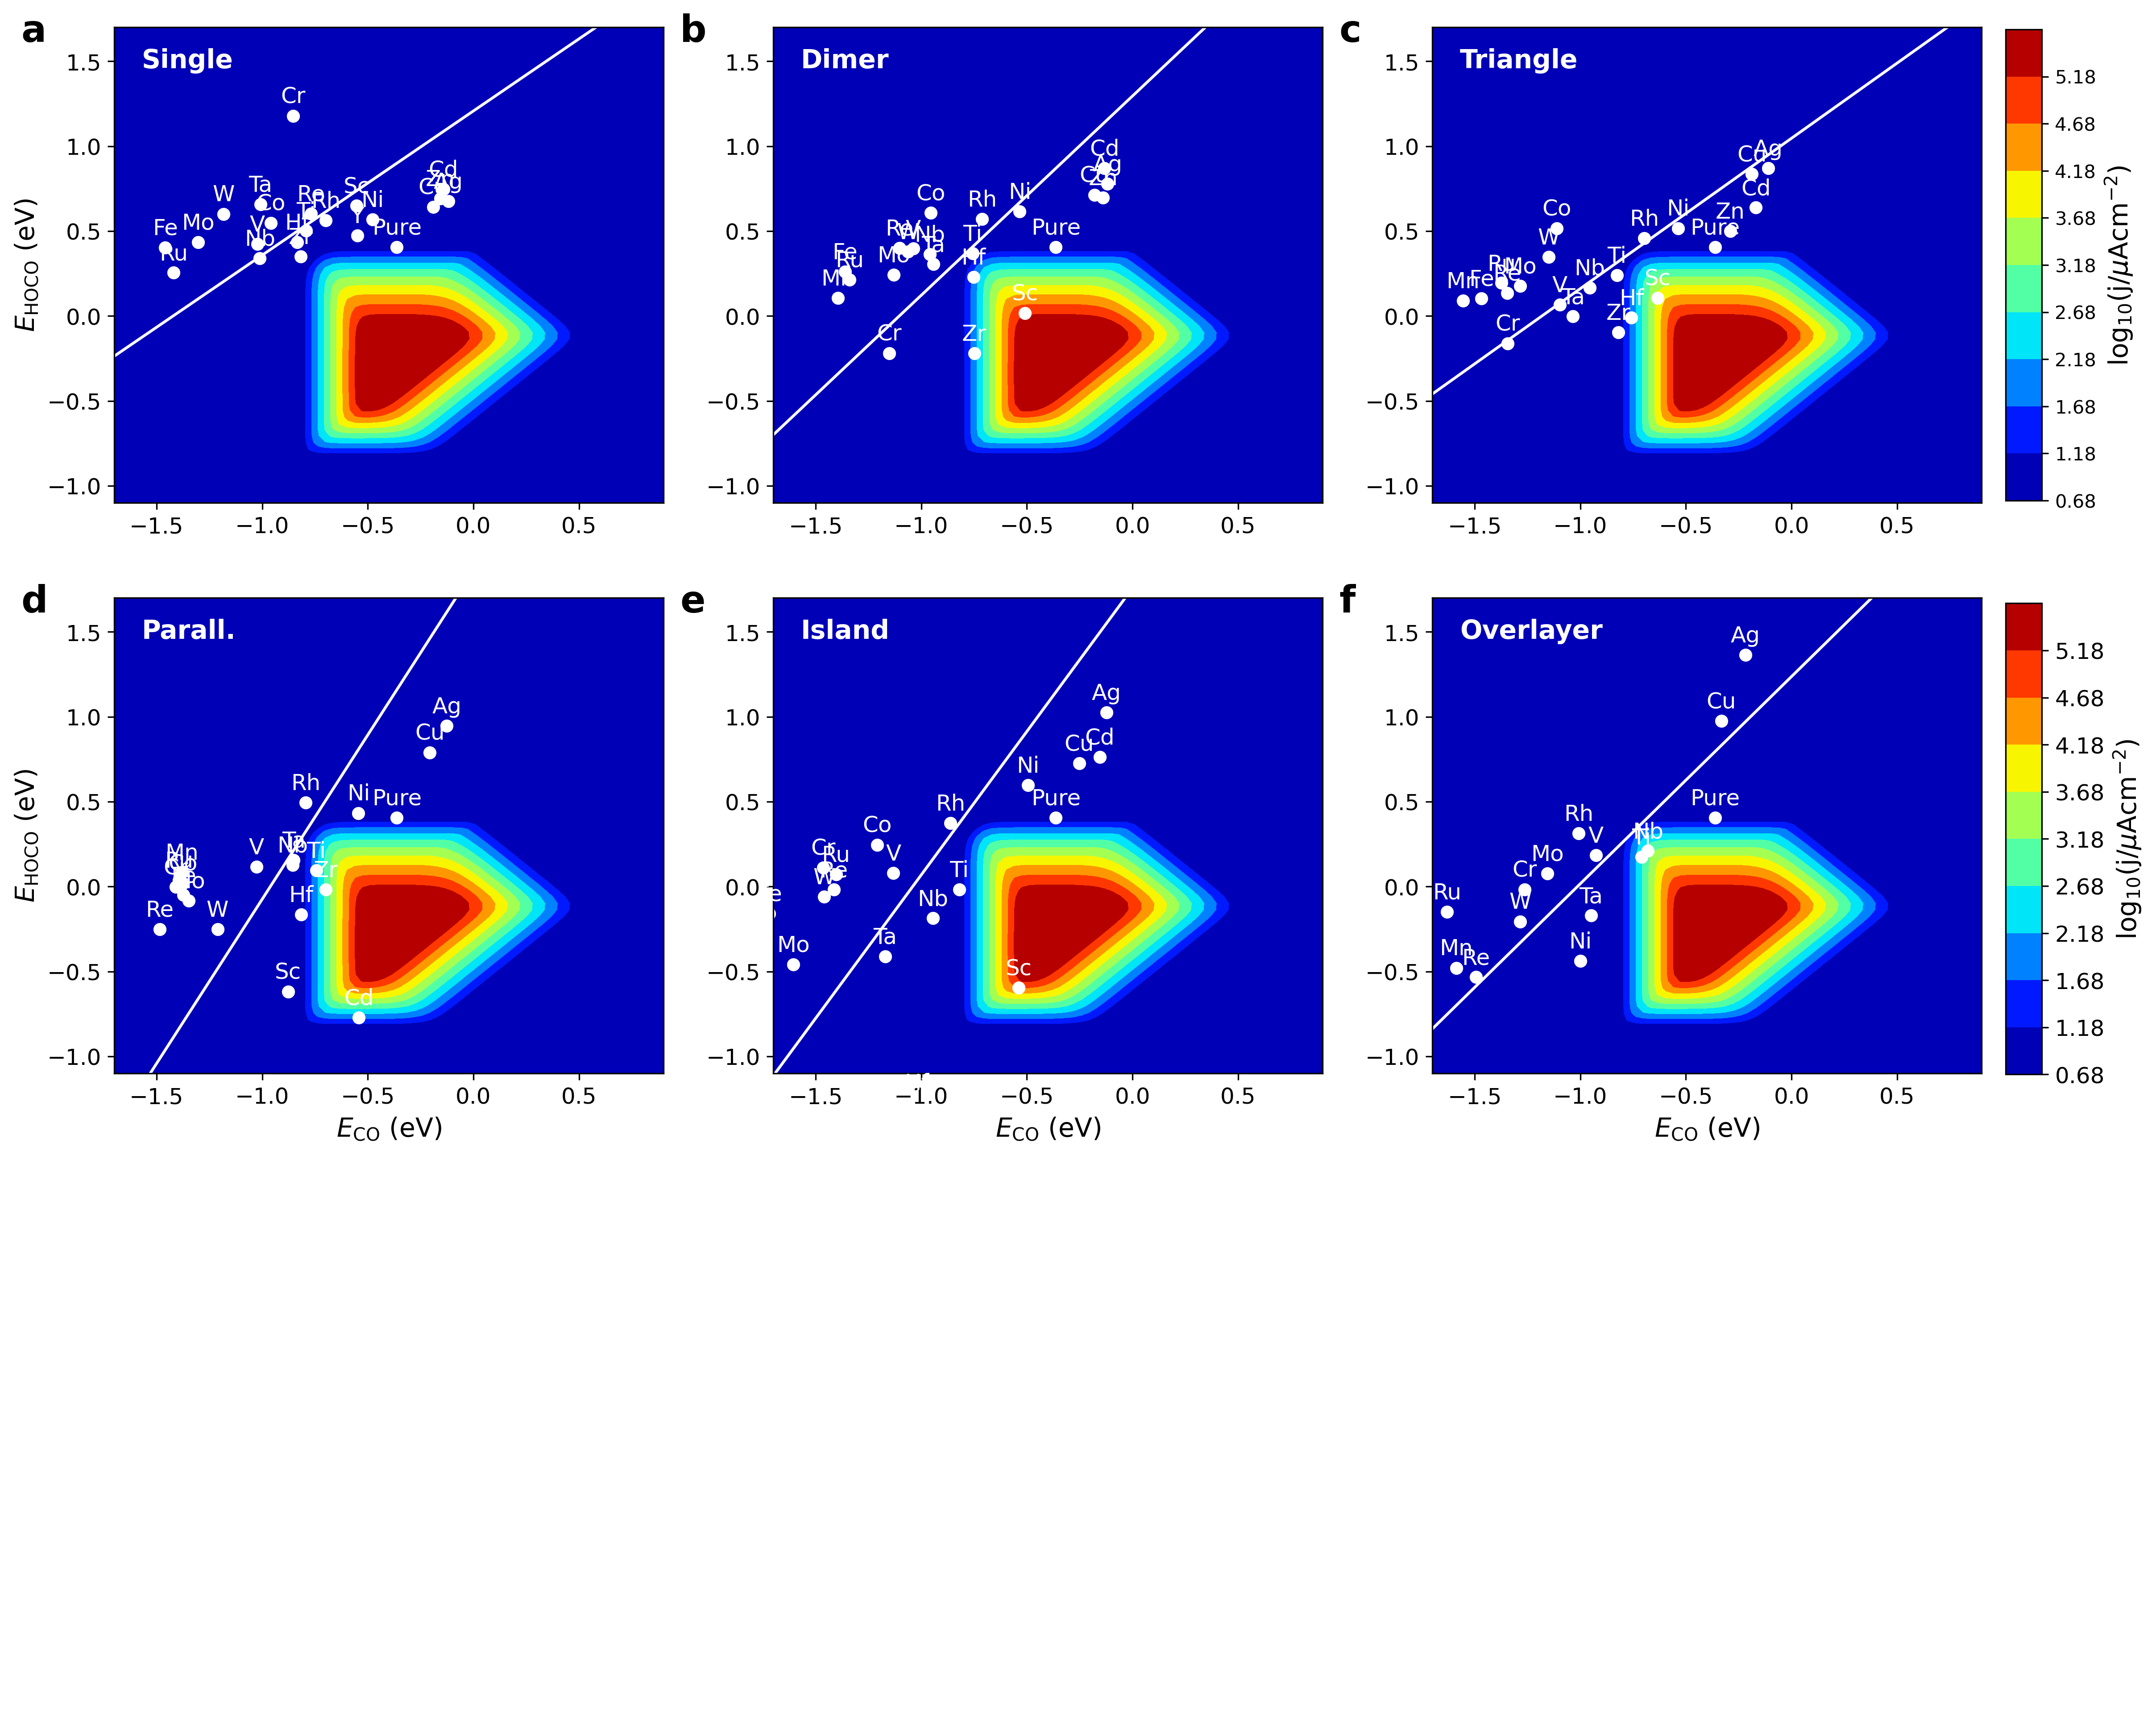

In [2]:
%matplotlib inline
import sys
sys.path.append("../../..")

from plotpackage.lib.io import read_excel, read_csv
from plotpackage.lib.CO2RR import CO2RRFEDplot
from plotpackage.lib.scalingrelation import ScalingRelationPlot
from plotpackage.lib.figsmetadata import FigsMetaData
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp
from CO2toCO_acid import CO2toCO
from matplotlib import rc
# rc('font', **{'family':'sans-serif','sans-serif':['Helvetica'], 'size':8})

G_CO2g = -18.418 # eV
G_H2g = -7.096# eV
G_H2Og = -12.827 # eV
G_COg = -12.564 # eV

kB = 8.617e-5 # Boltzmann constant in eV/K
hplanck = 4.135669e-15 # eV s
T0 = 297.15
# T0 = 370
Gact0 = Gact1 = Gact2 = 0.2 # activative free energy 0.475
tc0 = tc1 = tc2 = 0.5  #transfer coefficiency
A_act1 = np.exp( - Gact1 / ( kB * T0 ) ) # 
A_act2 = np.exp( - Gact2 / ( kB * T0 ) ) # electrochemical prefactor, fitting
G_1act_cap = -Gact1
G_2act_cap = -Gact2

A_prior = 3.6 * 10**4

nu_e = kB * T0 / hplanck
nu_c = 1.e13

cHp0 = 10.**(-0.)
UHER0 = URHE0 = kB * T0 * np.log(cHp0)   # introduced to shift the plotted potential window to the relevant range w

U0 = -0.3 # applied potential vs. she
U = U0 + UHER0

ddG_HOCO = 0.414 # correction from binding energy to free energy
ddG_CO = 0.579

def get_K1(E_HOCO, U, T=T0):
    """ K1 using HOCO binding
    """
    beta = 1. / (kB * T) 
    dG = E_HOCO + ddG_HOCO
    K1 = exp( - (dG + 1.0 * U ) * beta )
    return K1

def get_K2(E_HOCO, E_CO, U,  T=T0):
    """ K2 using HOCO and CO binding.
    """
    beta = 1. / (kB * T) 
    dG = E_CO + ddG_CO - E_HOCO - ddG_HOCO - G_CO2g - G_H2g + G_H2Og + G_COg
    K2 =  exp( - ( dG + 1.0 * U ) * beta ) 
    return K2

def get_K3(E_CO, U, T=T0):
    """ K3 asumming scaling.
    """
    beta = 1. / (kB * T) 
    dG = - (E_CO + ddG_CO)
    K3 = exp( - dG * beta )
    return K3



def get_k1(nu, E_HOCO, U, T=T0, tc=tc1):
    """ k1 using HOCO binding (vs CO2 and H2)
    """
    beta = 1. / (kB * T) 
    dG_rhe = E_HOCO + ddG_HOCO # vs. RHE
    Urev_rhe = -dG_rhe
    # dG_she = dG_rhe 
    # Urev_she = -dG_she + UHER0
    k1 = A_prior * exp( - max( ( U - Urev_rhe ) * tc, G_1act_cap) * beta ) 
    # k1 = nu * A_act1 * exp( - max( ( U - Urev_rhe ) * tc, G_1act_cap) * beta ) 
    
    #k1 = nu * A_act1 * exp( - min( ( U - dG_she ) * tc, 0) * beta ) 
    #dGw =  - kB * T * np.log(Kw)
    #dG = 0. * Gact0 + ddG_HOCO + E_HOCO + dGw
    #U0 = (1./tc - 1.) * dG - Gact0
    #k1 = nu * A_act1 * exp( - max( dG + ( U - U0 ) * tc, 0) * beta )
    return k1

def get_k2(nu, E_HOCO, E_CO, U, T=T0, tc=tc2):
    """ k2 using HOCO and CO energies.
    """    
    beta = 1. / (kB * T)  
    dG_rhe = E_CO + ddG_CO - E_HOCO - ddG_HOCO - G_CO2g - G_H2g + G_H2Og + G_COg
    Urev_rhe = -dG_rhe
    # dG_she = dG_rhe
    # Urev_she = - dG_she + URHE0
    k2 = A_prior * exp( - max(( U - Urev_rhe ) * tc, G_2act_cap) * beta ) 
    # k2 = nu * A_act2 * exp( - max(( U - Urev_rhe ) * tc, G_2act_cap) * beta ) 
    return k2

def get_k3(nu, E_CO, U, T=T0, tc=tc0):
    """ k3 assuming scaling.
    """
    beta = 1. / (kB * T) 
    dE = - E_CO
    dE = max(dE,0)
    k3 = nu * exp( - dE * beta )
    return k3


def get_rates(nu_e, nu_c, E_HOCO, E_CO, U, T=T0):
    """ Returns rate constants and equilibirum constants,
    """
    K1 = get_K1(E_HOCO, U, T=T)
    K2 = get_K2(E_HOCO, E_CO, U, T=T)
    K3 = get_K3(E_CO, U, T=T)
    k1 = get_k1(nu_e, E_HOCO, U, T=T)
    k2 = get_k2(nu_e, E_HOCO, E_CO, U, T=T)
    k3 = get_k3(nu_c, E_CO, U, T=T)
    return k1, K1, k2, K2, k3, K3


pCO2 = 1.
pCO =  0.005562
xH2O = 1.
cHp = cHp0 #1.
# N = 20*4
# M = 30*4
N = 20*4
M = 20*4
R = np.empty([M,N])
Thetas = np.empty([M,N,3])
# E_HOCO_e = np.linspace(-0.8, 1.45, M)
# E_CO_e = np.linspace(-2.2, 0.6, N)
E_CO_e = np.linspace(-1.8, 1., N)
E_HOCO_e = np.linspace(-1.2, 1.8, M)

jmax = 10.0e3 # exptl current plateau's at 10 mA/cm2 
jmin = 0.1
for j, E_CO in enumerate(E_CO_e):
    for i, E_HOCO in enumerate(E_HOCO_e):
        k1, K1, k2, K2, k3, K3 = get_rates(nu_e, nu_c, E_HOCO, E_CO, U, T=T0)
        rm = CO2toCO(pCO2, pCO, xH2O, cHp, k1, K1, k2, K2, k3, K3)
        # rm = CO2toCO(pCO2, pCO, xH2O, cOHm, k1, K1, k2, K2, k3, K3, T0)
        thetas, rates = rm.solve()
        # print(rates)
        rate = min(jmax, rates[0])
        rate = max(jmin, rate)
        R[i,j] = np.log10(rate*47.96) # TOF to current
        Thetas[i,j,:] = thetas

filename = './sites.xlsx'
#change it for excel and csv; ignore sheet, min_row, max_row, row_of_tag and col_of_ini_tag for csv
min_col = 1+10 #1st column in excel
max_col = 5+10 #5th column in excel

# #saved figure name
# figName1 = '../pictures/CO2RR_FreeEnergy_typesetting.jpg'  #free energy diagram name
# figName2 = '../pictures/ScalingRelation_typesetting.jpg' #scaling reation figure name

index = 0
fig = plt.figure(figsize=(18, 16), dpi = 300)
text = ['Single', 'Dimer', 'Triangle', 'Parall.', 'Island', 'Overlayer']
# col1 = [2, 2, 2, 3, 3, 5] #column in excel
# col2 = [3, 5, 4, 5, 4, 4] #column in excel
col1=2 # column in excel
col2=3 # column in excel
col1 = col1 - 2
col2 = col2 - 2
for types in ['single_b', 'dimer_b', 'triangle_b', 'paral_b', 'island_b', 'overly_b']:
    #change it only for excel
    sheet = types #Sheet1 by defaut
    min_row = 1+1 #1st column in excel
    max_row = 24+1 #9st column in excel
    
    ############ plot free energy diagram ###############
    stepsNames, observationName, X = read_excel(filename, sheet, min_col, max_col, min_row, max_row) #load excel data
    #stepsNames, observationName, X = read_csv(filename, , min_col, max_col) #load csv data
    
    # # del rows; delete according to element names in excel
    del_ele = []
    # if types == 'near-new':
    #     del_ele = ['Fe', 'Ru', 'Zr', 'Y', 'Mn', 'Nb', 'Zn' ] #remove distortion for near
    # if types == 'top-new':
    #     del_ele = [] #remove distortion for near
    # elif types == 'line':
    #     del_ele = ['Ag', 'Y'] #remove distortion for line
    # elif types == 'triangle':
    #     del_ele = ['Y',] #remove distortion for triangle
    # elif types == 'paral-new':
    #     del_ele = ['Zn', 'Y', 'Zr'] #remove distortion for paral
    # elif types == 'island-new':
    #     del_ele = ['Y', 'Zr',  'Zn'] #remove distortion for island
    # elif types == 'overly-new':
    #     del_ele = ['Sc', 'Zn', 'Y', 'Zr'] #remove distortion for line
    # if types == 'near-new':
    #     del_ele = ['Fe', 'Ru', 'Zr', 'Y', 'Mn', 'Nb', 'Zn' ] #remove distortion for near
    if types == 'single_b':
            del_ele = [] #remove distortion for near
    elif types == 'dimer_b':
        del_ele = ['Y', ] #remove distortion for line
    elif types == 'triangle_b':
        del_ele = ['Y',] #remove distortion for triangle
    elif types == 'paral_b':
        del_ele = ['Zn', 'Y',] #remove distortion for paral
    elif types == 'island_b':
        del_ele = ['Zn', 'Y', 'Zr'] #remove distortion for island
    elif types == 'overly_b':
        del_ele = ['Sc', 'Zn', 'Y', 'Zr'] #remove distortion for line
        
    del_rows = [observationName.index(each)+2 for each in del_ele]
    ### del_rows = [10, 12, 13, 18]  #delete according to rows in excel
    del_list = [x - 2 for x in del_rows]
    observationName = np.delete(observationName, del_list, 0)
    X = np.delete(X, del_list, 0)
    
    M  = 3
    ax = plt.subplot(3, 3, index + 1)
    EHOCO_d = (X[:, col1]).astype(float) 
    ECO_d = (X[:, col2]).astype(float) 
    # sr = ScalingRelationPlot(descriper1, descriper2, observationName, figName2)   
    # sr.plot(ax = ax, save=False, title='', xlabel=stepsNames[col1], ylabel=stepsNames[col2], text=text[index])
    
    contours = np.linspace(np.log10(jmin*47.96), np.log10(jmax*47.96), 11) 
    plt.contourf(E_CO_e, E_HOCO_e, R, contours, cmap=plt.cm.jet) # plot countour
    
    
    for i,metal in enumerate(observationName):
        plt.plot(ECO_d[i], EHOCO_d[i], 'o', color='white') 
        plt.text(ECO_d[i], EHOCO_d[i]+0.05, metal, fontsize=12, horizontalalignment='center', verticalalignment='bottom', color='white')
    
    #linear fiting and plot linear line
    # m, b = np.polyfit(ECO_d, EHOCO_d, 1)
    # plt.axline((ECO_d[3], ECO_d[3]*m +b), slope=m, color='white')
    m, b = np.polyfit(EHOCO_d, ECO_d, 1)
    plt.axline(( ECO_d[0], ECO_d[0]/m-b/m), slope=1/m, color='white')
    # plt.plot(self.descriper1, m * self.descriper1 + b, linewidth=2, color=linecolor)
        
    plt.xlim([E_CO_e[0]+0.1, E_CO_e[-1]-0.1])
    plt.ylim([E_HOCO_e[0]+0.1, E_HOCO_e[-1]-0.1])
    ax.tick_params(labelsize=12) #tick label font size
    # plt.title(text[index], fontsize=14,)
    plt.text(0.05, 0.93, text[index], horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=14, color='white', fontweight='bold')        
    # if index==2 or index==5:
    #     bar = plt.colorbar(ticks=np.arange(min(contours), max(contours), 0.5))
    #     bar.set_label(r'log$_{10}$(j/$\mu$Acm$^{-2}$)')
    if index==3 or index==4 or index==5:
        plt.xlabel(r'$E_{\mathrm{CO}}$ (eV)', fontsize=14,)
    if index==0 or index==3:
        plt.ylabel(r'$E_{\mathrm{HOCO}}$ (eV)', fontsize=14,)
    if index==2:
        cbaxes = fig.add_axes([0.91, 0.659, 0.015, 0.22]) #Add position (left, bottom, width, height)
        bar = plt.colorbar(ticks=np.arange(min(contours), max(contours), 0.5), cax=cbaxes)
        bar.ax.tick_params(labelsize=10)
        bar.set_label(r'log$_{10}$(j/$\mu$Acm$^{-2}$)', fontsize=14,)
    if index==5:
        cbaxes = fig.add_axes([0.91, 0.391, 0.015, 0.22]) #Add position (left, bottom, width, height)
        bar = plt.colorbar(ticks=np.arange(min(contours), max(contours), 0.5), cax=cbaxes)
        bar.ax.tick_params(labelsize=12)
        bar.set_label(r'log$_{10}$(j/$\mu$Acm$^{-2}$)', fontsize=14,)
    
    import string
    ax.text(-0.17, 0.97, string.ascii_lowercase[index], transform=ax.transAxes, size=20, weight='bold')
    
    index = index +1


# fig.tight_layout()
plt.savefig('./paper1/Rate_vs_HOCO_CO.png', dpi=300, bbox_inches='tight')    
plt.show()


# Selectivity

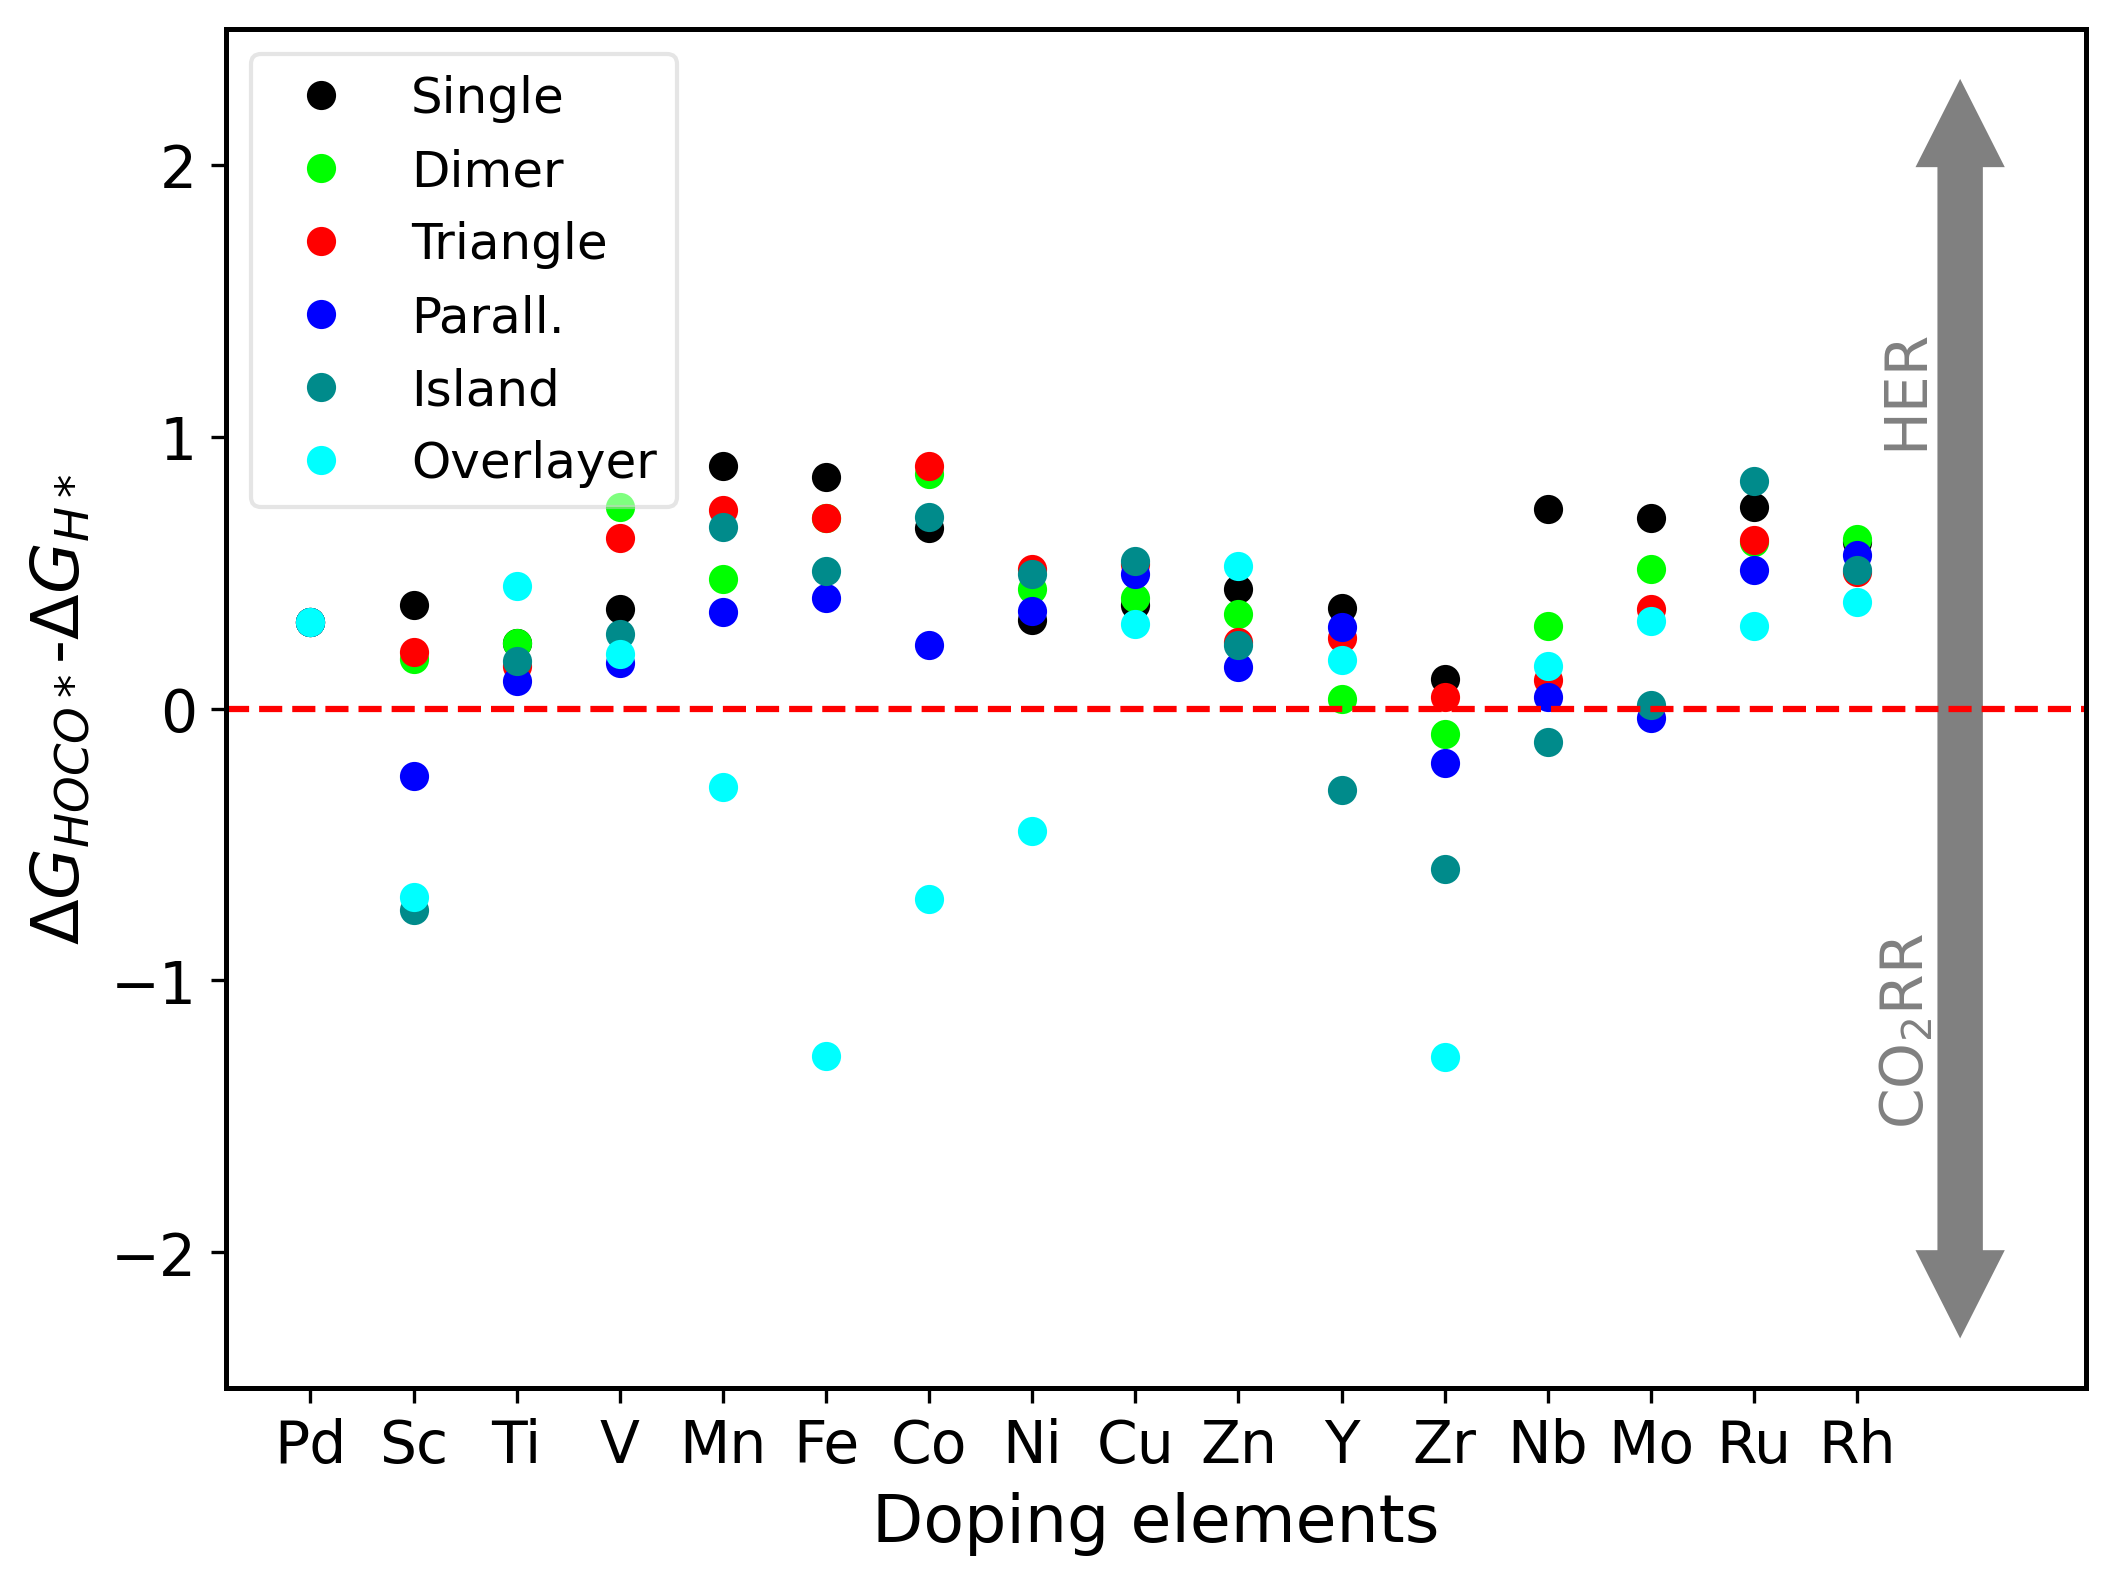

In [8]:
%matplotlib inline
from plotpackage.lib.io import read_excel, read_csv
from plotpackage.lib.figsmetadata import FigsMetaData
import matplotlib.pyplot as plt
import numpy as np

filename = './sites.xlsx'
#change it for excel and csv; ignore sheet, min_row, max_row, row_of_tag and col_of_ini_tag for csv
min_col = 1 #1st column in excel
max_col = 7 #5th column in excel

#change it only for excel
sheet = 'selectivity' #Sheet1 by defaut
# sheet = 'Formation Energy' #Sheet1 by defaut
min_row = 1 #1st column in excel
max_row = 17 #9st column in excel

#saved figure name
figName1 = './paper1/Selectivity.jpg'  #free energy diagram name

############ plot free energy diagram ###############
colorList = ['k', 'lime', 'r', 'b', 'darkcyan', 'cyan', 'olive', 'magenta', 'pink', 'gray', 'orange', 'purple', 'g']
typeNames, observationName, X = read_excel(filename, sheet, min_col, max_col, min_row, max_row) #load excel data
#stepsNames, observationName, X = read_csv(filename, , min_col, max_col) #load csv data

fig = plt.figure(figsize=(8, 6), dpi = 300)
x = np.arange(0,len(observationName),1)

marker = ['o', '^', '<', '>', 'v', 's', 'd', '.', ',', 'x', '+']
for i in range(len(typeNames)):    
    plt.plot(x, X[:,i], 'o', color=colorList[i])  #plot dots
    # plt.plot(x, X[:,i], marker[i], color=colorList[i])  #plot dots

typeNames = ['Single', 'Dimer', 'Triangle', 'Parall.', 'Island', 'Overlayer']     
plt.legend(typeNames, framealpha=0.5, fontsize=12)
plt.axhline(y=0, color='r', linestyle='--')

# plt.xlim([-10, 8])
plt.ylim([-2.5, 2.5])
plt.xlabel('Doping elements', fontsize=16)
# plt.ylabel('Formation energy (eV/atom)', fontsize=14)
plt.ylabel('$\Delta G_{HOCO*}$-$\Delta G_{H*}$', fontsize=16)
# plt.title(sheet, fontsize=16)
ax = fig.gca()
ax.set_xticks(x)
ax.set_xticklabels(observationName)


ax.tick_params(labelsize=14) #tick label font size
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.2) #linewith of frame

    
plt.arrow(x=16, y=0, dx=0, dy=2, width=.4, head_width=0.8, head_length=0.3, color='grey') 
plt.annotate('HER', xy = (15.2, 1), rotation=90, fontsize=14, color='grey')

plt.arrow(x=16, y=0, dx=0, dy=-2, width=.4, head_width=0.8, head_length=0.3, color='grey') 
plt.annotate('CO$_2$RR', xy = (15.2, -1.5), rotation=90, fontsize=14, color='grey')
# import matplotlib.transforms
# import matplotlib.path
# from matplotlib.collections import LineCollection

# def rainbowarrow(ax, start, end, cmap="viridis", n=50,lw=3):
#     cmap = plt.get_cmap(cmap,n)
#     # Arrow shaft: LineCollection
#     x = np.linspace(start[0],end[0],n)
#     y = np.linspace(start[1],end[1],n)
#     points = np.array([x,y]).T.reshape(-1,1,2)
#     segments = np.concatenate([points[:-1],points[1:]], axis=1)
#     lc = LineCollection(segments, cmap=cmap, linewidth=lw)
#     lc.set_array(np.linspace(0,1,n))
#     ax.add_collection(lc)
#     # Arrow head: Triangle
#     tricoords = [(0,-0.4),(0.5,0),(0,0.4),(0,-0.4)]
#     angle = np.arctan2(end[1]-start[1],end[0]-start[0])
#     rot = matplotlib.transforms.Affine2D().rotate(angle)
#     tricoords2 = rot.transform(tricoords)
#     tri = matplotlib.path.Path(tricoords2, closed=True)
#     ax.scatter(end[0],end[1], c=1, s=(2*lw)**2, marker=tri, cmap=cmap,vmin=0)
#     ax.autoscale_view()

# rainbowarrow(ax, (16,0), (16, 2), cmap='Reds', n=50, lw=9) 
# plt.annotate('HER', xy = (16.2, 1), rotation=90, fontsize=14)

# rainbowarrow(ax, (16,0), (16, -2), cmap='Reds', n=50, lw=9) 
# plt.annotate('CO$_2$RR', xy = (16.2, -1.5), rotation=90, fontsize=14)


# add background
# plotlim = plt.xlim() + plt.ylim() 
# ax.imshow([[.6, .6], [.7, .7]], interpolation='bicubic', cmap=plt.cm.gray, extent=(-0.8, 16.8, 0, 2.5))
# ax.imshow([[.6, .6], [.7, .7]], interpolation='bicubic', cmap=plt.cm.gray, extent=(-0.8, 16.8, 0, -2.5))
# ax.set_aspect('auto') 


fig.savefig(figName1, dpi=300, bbox_inches='tight')
plt.show()

#add metadata into pictures
# figNames = [figName1]
# fmd = FigsMetaData(figNames, filename, sheet, min_col, max_col, min_row, max_row)
# fmd.add_metadata()

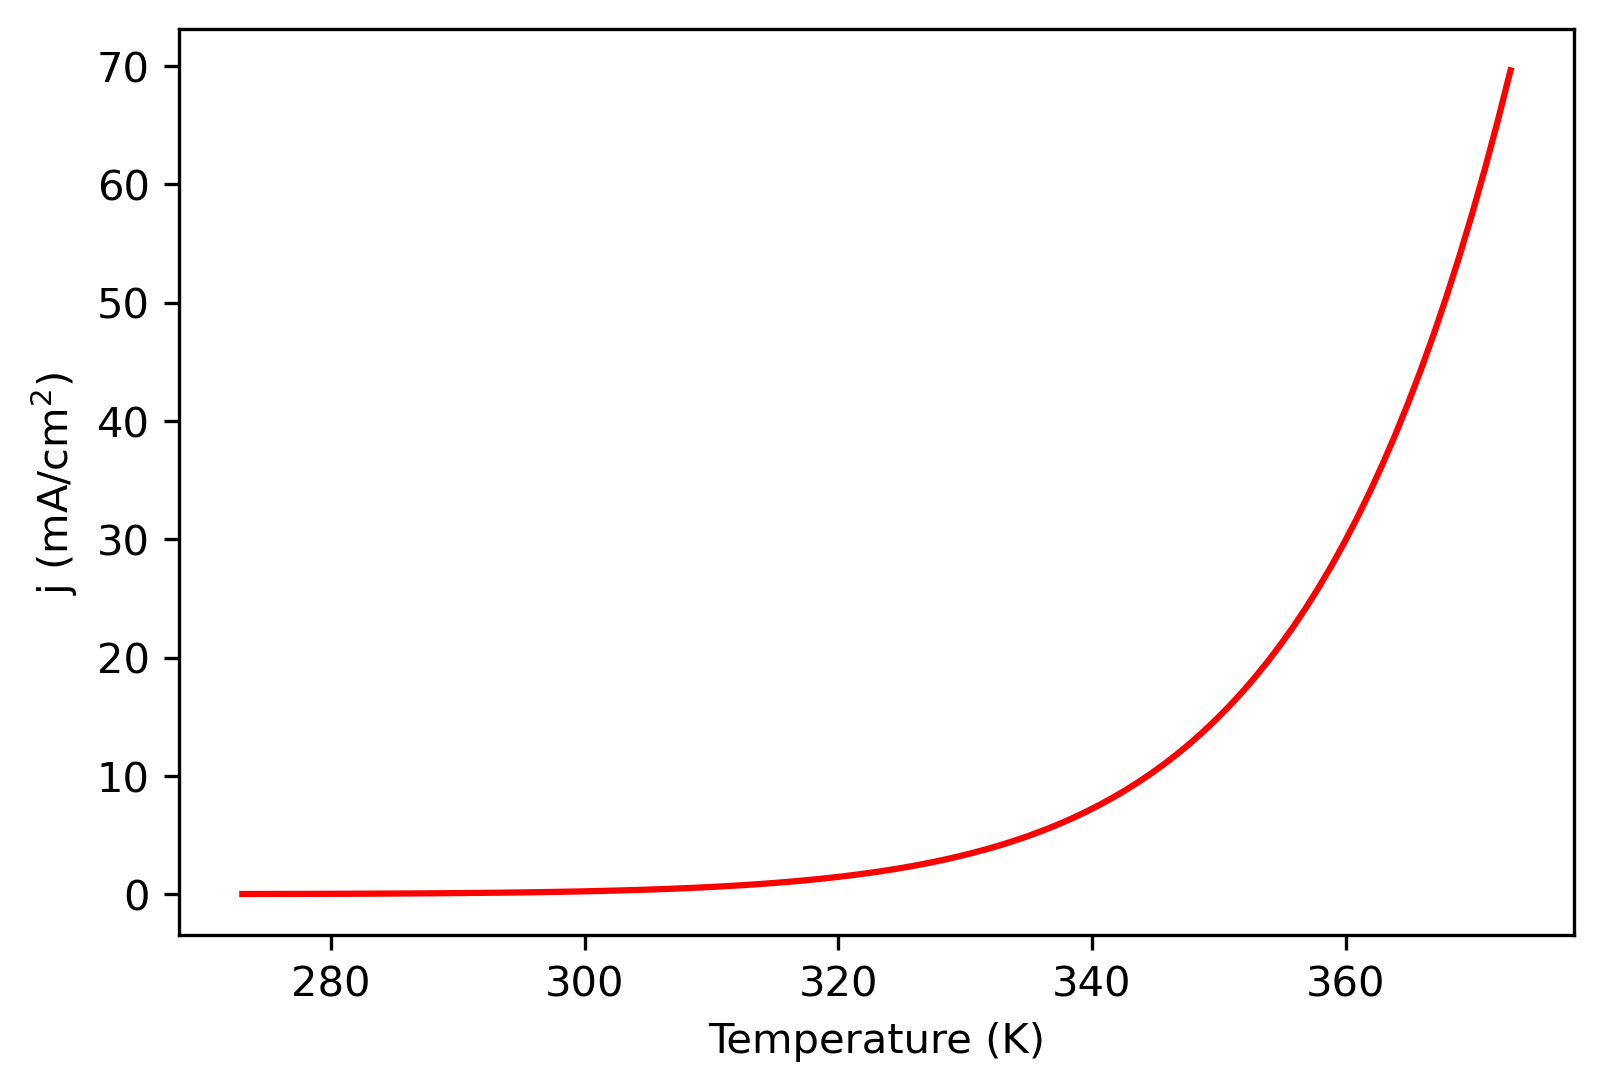

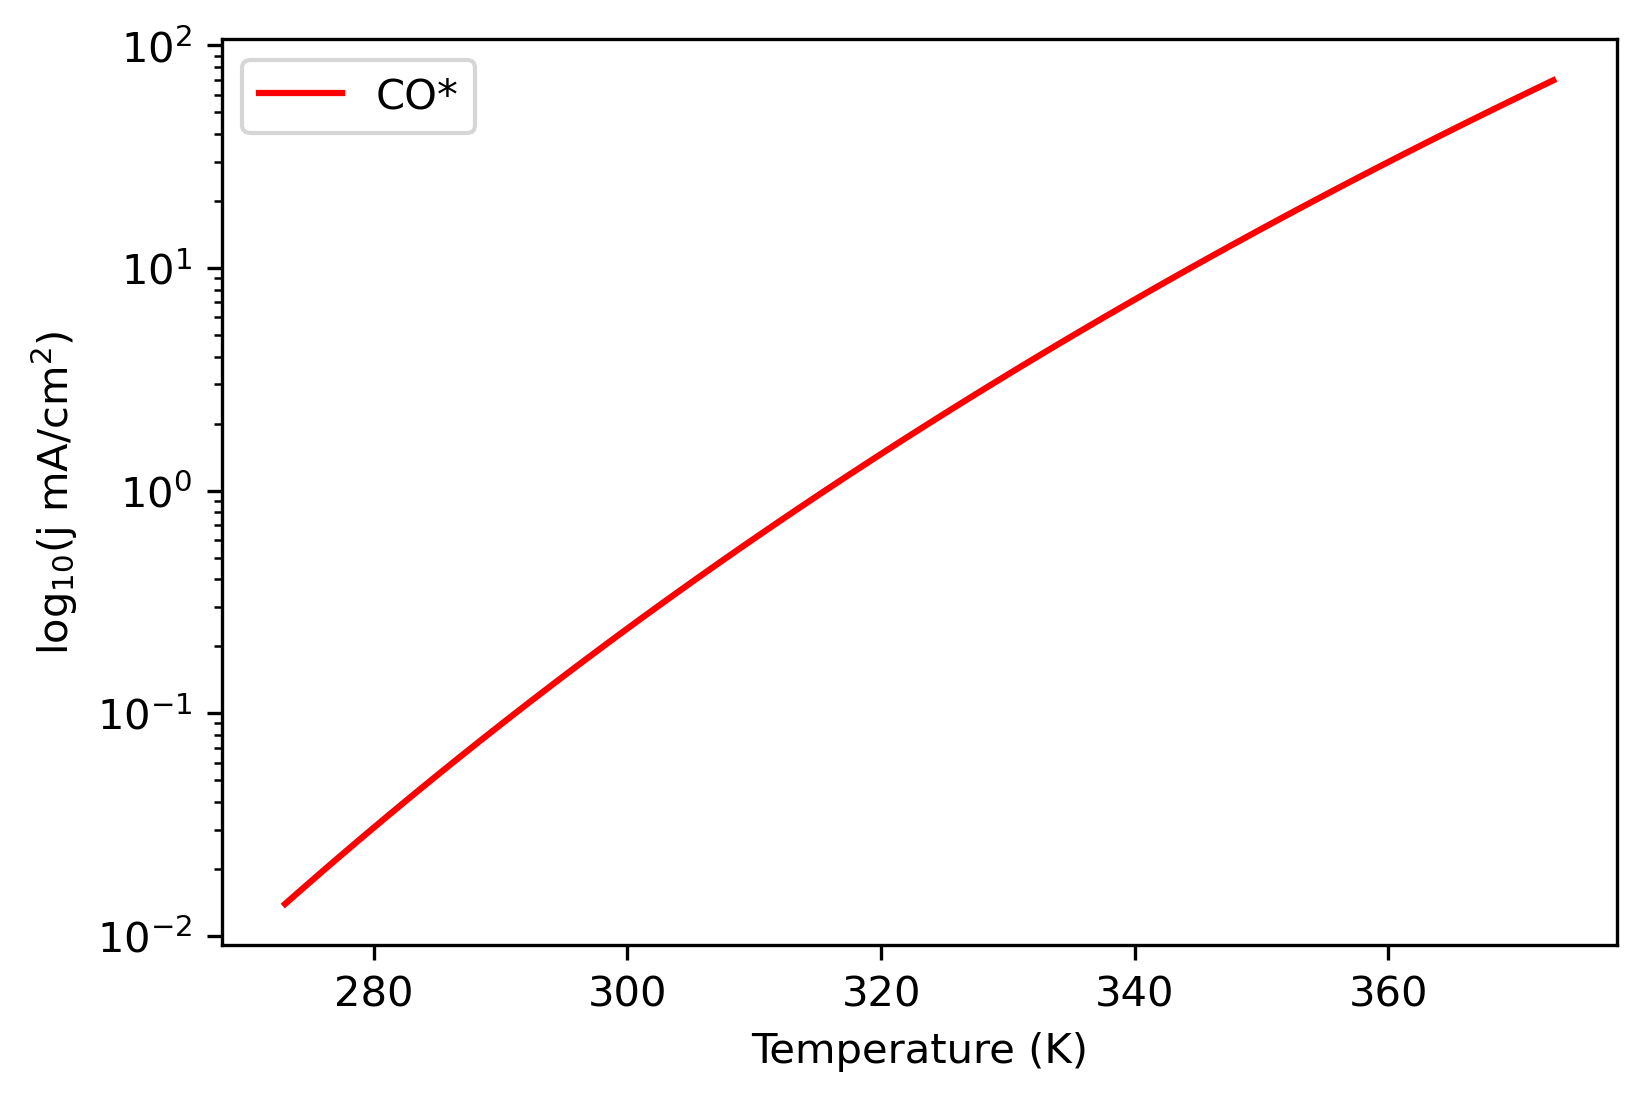

In [15]:
import numpy as np
from numpy import exp, log
from CO2toCO_acid import CO2toCO
import matplotlib.pyplot as plt

G_CO2g = -18.418 # eV
G_H2g = -7.096# eV
G_H2Og = -12.827 # eV
G_COg = -12.564 # eV

kB = 8.617e-5 # Boltzmann constant in eV/K
hplanck = 4.135669e-15 # eV s
T0 = 297.15
Gact0 = Gact1 = Gact2 =0.475# activative free energy
tc0 = tc1 = tc2 = 1  #transition state coefficency
A_act1 = np.exp( - Gact1 / ( kB * T0 ) ) # 
A_act2 = np.exp( - Gact2 / ( kB * T0 ) ) # electrochemical prefactor, fitting
G_1act_cap = -Gact1
G_2act_cap = -Gact2

A_prior = 3.6 * 10**4

nu_e = kB * T0 / hplanck
nu_c = 1.e13

cHp0 = 10.**(-0.)
UHER0 = URHE0 = kB * T0 * np.log(cHp0)   # introduced to shift the plotted potential window to the relevant range w

U0 = -0.3 # applied potential vs. she
U = U0 + UHER0

ddG_HOCO = 0.414 # correction from binding energy to free energy
ddG_CO = 0.579



def get_K1(E_HOCO, U, T=T0):
    """ K1 using HOCO binding
    """
    beta = 1. / (kB * T) 
    dG = E_HOCO + ddG_HOCO
    K1 = exp( - (dG + 1.0 * U ) * beta )
    return K1

def get_K2(E_HOCO, E_CO, U,  T=T0):
    """ K2 using HOCO and CO binding.
    """
    beta = 1. / (kB * T) 
    dG = E_CO + ddG_CO - E_HOCO - ddG_HOCO - G_CO2g - G_H2g + G_H2Og + G_COg
    K2 =  exp( - ( dG + 1.0 * U ) * beta ) 
    return K2

def get_K3(E_CO, U, T=T0):
    """ K3 asumming scaling.
    """
    beta = 1. / (kB * T) 
    dG = - (E_CO + ddG_CO)
    K3 = exp( - dG * beta )
    return K3


def get_k1(nu, E_HOCO, U, T=T0, tc=tc1):
    """ k1 using HOCO binding (vs CO2 and H2)
    """
    beta = 1. / (kB * T) 
    dG_rhe = E_HOCO + ddG_HOCO # vs. RHE
    Urev_rhe = -dG_rhe
    # dG_she = dG_rhe 
    # Urev_she = -dG_she + UHER0
    k1 = A_prior * exp( - max( ( U - Urev_rhe ) * tc, G_1act_cap) * beta ) 
    # k1 = nu * A_act1 * exp( - max( ( U - Urev_rhe ) * tc, G_1act_cap) * beta ) 
    
    #k1 = nu * A_act1 * exp( - min( ( U - dG_she ) * tc, 0) * beta ) 
    #dGw =  - kB * T * np.log(Kw)
    #dG = 0. * Gact0 + ddG_HOCO + E_HOCO + dGw
    #U0 = (1./tc - 1.) * dG - Gact0
    #k1 = nu * A_act1 * exp( - max( dG + ( U - U0 ) * tc, 0) * beta )
    return k1

def get_k2(nu, E_HOCO, E_CO, U, T=T0, tc=tc2):
    """ k2 using HOCO and CO energies.
    """    
    beta = 1. / (kB * T)  
    dG_rhe = E_CO + ddG_CO - E_HOCO - ddG_HOCO - G_CO2g - G_H2g + G_H2Og + G_COg
    Urev_rhe = -dG_rhe
    # dG_she = dG_rhe
    # Urev_she = - dG_she + URHE0
    k2 = A_prior * exp( - max(( U - Urev_rhe ) * tc, G_2act_cap) * beta ) 
    # k2 = nu * A_act2 * exp( - max(( U - Urev_rhe ) * tc, G_2act_cap) * beta ) 
    return k2

def get_k3(nu, E_CO, U, T=T0, tc=tc0):
    """ k3 assuming scaling.
    """
    beta = 1. / (kB * T) 
    dE = - E_CO
    dE = max(dE,0)
    k3 = nu * exp( - dE * beta )
    return k3


def get_rates(nu_e, nu_c, E_HOCO, E_CO, U, T=T0):
    """ Returns rate constants and equilibirum constants,
    """
    K1 = get_K1(E_HOCO, U, T=T)
    K2 = get_K2(E_HOCO, E_CO, U, T=T)
    K3 = get_K3(E_CO, U, T=T)
    k1 = get_k1(nu_e, E_HOCO, U, T=T)
    k2 = get_k2(nu_e, E_HOCO, E_CO, U, T=T)
    k3 = get_k3(nu_c, E_CO, U, T=T)
    return k1, K1, k2, K2, k3, K3

ECO_d = {
    "Pd": -0.36259556,
    # "Sc": -0.53887365,
    "Ti": -0.7954072,
    "V": -1.07970746,
    "Mn": -1.31038448,
    "Fe": -1.3575169,
    "Co": -0.90030351,
    "Ni": -0.49399452,
    "Cu": -0.25260203,
    # "Zn": -0.11389156,
    # "Y": -2.81622299,
    # "Zr": -0.10195565,
    "Nb": -0.94465297,
    "Mo": -0.76108613,
    "Ru": -1.20819791,
    "Rh": -0.6742065,
    "Ag": -0.09120301
}


EHOCO_d = {
    "Pd": 0.42967678,
    # "Sc": -0.08249209,
    "Ti": 0.09677125,
    "V": 0.08057561,
    "Mn": -0.28851255,
    "Fe": -0.15955723,
    "Co": 0.47024493,
    "Ni": 0.67499474,
    "Cu": 1.22119557,
    # "Zn": 0.54101516,
    # "Y": -2.76843569,
    # "Zr": -1.44950915,
    "Nb": 0.14885378,
    "Mo": 0.12097152,
    "Ru": 0.32770351,
    "Rh": 0.53514527,
    "Ag": 1.57118722
}


if __name__ == '__main__':
    pCO2 = 1.
    pCO =  0.005562
#     pCO =  1.
    xH2O = 1.
    cHp = cHp0 #1.
    
    # volcano plot
    if 0:
        # N = 20*4
        # M = 30*4
        N = 20*4
        M = 20*4
        R = np.empty([M,N])
        Thetas = np.empty([M,N,3])
        # E_HOCO_e = np.linspace(-0.8, 1.45, M)
        # E_CO_e = np.linspace(-2.2, 0.6, N)
        E_CO_e = np.linspace(-1.5, 1., N)
        E_HOCO_e = np.linspace(-1.2, 1.8, M)
        # EHOCOs = np.linspace(-1, 2, N)
        # ECOs = np.linspace(-2, 0, N)
    
        jmax = 10.0e3 # exptl current plateau's at 10 mA/cm2 
        jmin = 0.1
        for j, E_CO in enumerate(E_CO_e):
            for i, E_HOCO in enumerate(E_HOCO_e):
                k1, K1, k2, K2, k3, K3 = get_rates(nu_e, nu_c, E_HOCO, E_CO, U, T=T0)
                rm = CO2toCO(pCO2, pCO, xH2O, cHp, k1, K1, k2, K2, k3, K3)
                # rm = CO2toCO(pCO2, pCO, xH2O, cOHm, k1, K1, k2, K2, k3, K3, T0)
                thetas, rates = rm.solve()
                # print(rates)
                rate = min(jmax, rates[0])
                rate = max(jmin, rate)
                R[i,j] = np.log10(rate)
                Thetas[i,j,:] = thetas
    
        # data for the elements
        metals = ECO_d.keys()
    
        from matplotlib import rc
        rc('font', **{'family':'sans-serif','sans-serif':['Helvetica'], 'size':8})
        #rc('text', usetex=True)
        
        plt.figure(1, dpi=300)
        plt.clf()
        plt.subplots_adjust(left=.16, bottom=.16, right=.96, top=.90)
        # pl.hold(1)
        contours = np.linspace(np.log10(jmin), np.log10(jmax), 11) 
        plt.contourf(E_CO_e, E_HOCO_e, R, contours, cmap=plt.cm.jet)
        # E_HOCO_scaling = HOCO_CO_scaling(E_CO_e)
        # pl.plot(E_CO_e, E_HOCO_scaling,'-k', lw=1)
        # for i in range(len(ECO_d)): # elements
        #     pl.text(ECO_d[i], EHOCO_d[i], texts[i], 
        #             ha='center', va='center')
        for i,metal in enumerate(metals):
            plt.plot(ECO_d[metal], EHOCO_d[metal], 'o', color='black') 
            plt.text(ECO_d[metal], EHOCO_d[metal]+0.05, metal, fontsize=12, horizontalalignment='center', verticalalignment='bottom')
        
        #linear fiting and plot linear line
        m, b = np.polyfit(list(ECO_d.values()), list(EHOCO_d.values()), 1)
        # pl.plot(list(ECO_d.values()), m * np.array(list(ECO_d.values())) + b, linewidth=1, color='black')
        plt.axline((list(ECO_d.values())[0], list(ECO_d.values())[0]*m +b), slope=m, color='black')
        plt.xlim([E_CO_e[0]+0.1, E_CO_e[-1]-0.1])
        plt.ylim([E_HOCO_e[0]+0.1, E_HOCO_e[-1]-0.1])
        plt.colorbar(ticks=np.arange(min(contours), max(contours), 0.5))
        plt.title(r'log$_{10}$(j/$\mu$Acm$^{-2}$)')
        plt.xlabel(r'$E_{\mathrm{CO}}$ (eV)')
        plt.ylabel(r'$E_{\mathrm{HOCO}}$ (eV)')
        plt.savefig('../data/CO2toCO_rate_vs_HOCO_CO.png', dpi=300)
        plt.show()
    
    E_HOCO = 0.09
    E_CO = -0.72 # Ti for para.
#     E_HOCO = 0.43
#     E_CO = -0.36 # pure PdH
    
    if 0: # test K1, K2, K3 using Cu(211) as an example
        N = 10
        dG1 = []
        dG2 = []
        dG3 = []
        U = np.linspace(-1.25, 1, N)
        for i, u in enumerate(U):
            # print(i)
#             E_HOCO = 0.09
#             E_CO = -0.72 # Ti for para.
#             E_HOCO = 0.43
#             E_CO = -0.36 # pure PdH
            # U = -0.0
            K1 = get_K1(E_HOCO, u, T=T0)
            K2 = get_K2(E_HOCO, E_CO, u, T=T0)
            K3 = get_K3(E_CO, u, T=T0)
            # K1_s = get_K1(E_CO, U, T=T0)
            # K2_s = get_K2(E_CO, U, T=T0)
            # K3_s = get_K3(E_CO, U, T=T0)
            dG1.append(-kB*T0*np.log(K1))
            dG2.append(-kB*T0*np.log(K2))
            dG3.append(-kB*T0*np.log(K3))
            # dG1_s, dG2_s, dG3_s = -kB*T0*np.log(K1_s), -kB*T0*np.log(K2_s), -kB*T0*np.log(K3_s)
            # print(ddG_HOCO, ddG_CO)
            # print(dG1, dG1 + dG2, dG1 + dG2 + dG3)
            # print(dG1_s, dG1_s + dG2_s, dG1_s + dG2_s + dG3_s)
        plt.figure(1, dpi=300)
        plt.plot(U, dG1, color='black', label='dG1')
        plt.plot(U, dG2, color='red', label='dG2')
        plt.plot(U, dG3, color='blue', label='dG3')
        plt.xlabel(r'Potential (V)')
        plt.ylabel(r'${\Delta}$G (eV)')
        plt.legend()
    
    #coverage
    if 0:
        N = 100
        Thetas1 = []
        Thetas2 = []
        Thetas3 = []
        U = np.linspace(-2, 0, N)
        for i, u in enumerate(U):
#             print('===============================')
#             print(u)
#             E_HOCO = 0.09
#             E_CO = -0.72 # Ti for para.
#             E_HOCO = 0.43
#             E_CO = -0.36 # pure PdH
            # U = -0.0
            k1, K1, k2, K2, k3, K3 = get_rates(nu_e, nu_c, E_HOCO, E_CO, u, T=T0)
            rm = CO2toCO(pCO2, pCO, xH2O, cHp, k1, K1, k2, K2, k3, K3)
            # rm = CO2toCO(pCO2, pCO, xH2O, cOHm, k1, K1, k2, K2, k3, K3, T0)
            thetas, rates = rm.solve()
            # print(rates)
            # rate = min(jmax, rates[0])
            # rate = max(jmin, rate)
            # R[i,j] = np.log10(rate)
            # print(thetas)
            Thetas1.append(thetas[0])
            Thetas2.append(thetas[1])
            Thetas3.append(thetas[2])
            # dG1_s, dG2_s, dG3_s = -kB*T0*np.log(K1_s), -kB*T0*np.log(K2_s), -kB*T0*np.log(K3_s)
            # print(ddG_HOCO, ddG_CO)
            # print(dG1, dG1 + dG2, dG1 + dG2 + dG3)
            # print(dG1_s, dG1_s + dG2_s, dG1_s + dG2_s + dG3_s)
        plt.figure(2, dpi=300)
        plt.plot(U, Thetas1, color='black', label='HOCO*')
        plt.plot(U, Thetas2, color='red', label='CO*')
        plt.plot(U, Thetas3, color='blue', label='*')
        plt.xlabel(r'Potential (V)')
        plt.ylabel(r'Coverage (a.u.)')
        plt.legend()
    #rate vs. U
    if 0:
        N = 100
        R = []
        U = np.linspace(-2, 0, N)
        # jmax = 10.0e3 # exptl current plateau's at 10 mA/cm2 
        # jmin = 0.1
        for i, u in enumerate(U):
#             print('===============================')
#             print(u)
#             E_HOCO = 0.09
#             E_CO = -0.72 # Ti for para.
#             E_HOCO = 0.43
#             E_CO = -0.36 # pure PdH
            # U = -0.0
            k1, K1, k2, K2, k3, K3 = get_rates(nu_e, nu_c, E_HOCO, E_CO, u, T=T0)
            rm = CO2toCO(pCO2, pCO, xH2O, cHp, k1, K1, k2, K2, k3, K3)
            # rm = CO2toCO(pCO2, pCO, xH2O, cOHm, k1, K1, k2, K2, k3, K3, T0)
            thetas, rates = rm.solve()
            # print(rates)
            # rate = min(jmax, rates[0])
            # rate = max(jmin, rate)
            # R.append(np.log10(rates[0]))
            R.append(rates[0])
            # print(thetas)
            
            # dG1_s, dG2_s, dG3_s = -kB*T0*np.log(K1_s), -kB*T0*np.log(K2_s), -kB*T0*np.log(K3_s)
            # print(ddG_HOCO, ddG_CO)
            # print(dG1, dG1 + dG2, dG1 + dG2 + dG3)
            # print(dG1_s, dG1_s + dG2_s, dG1_s + dG2_s + dG3_s)
        plt.figure(3, dpi=300)
        plt.plot(U, R, color='black', label='')
        plt.xlabel(r'Potential (V)')
        plt.ylabel(r'rate')
        plt.legend()
        
    # jCO* vs. T
    def get_TOF(E_HOCO, E_CO, T):
        """ get turnover frequency
        """
        TOF = kB * T / hplanck * exp( E_CO / (kB * T)  )
        return TOF

    if 1:
        N = 100
        TOF = []
        temper = np.linspace(273, 373, N)
        for i, temp in enumerate(temper):
#             print('===============================')
#             print(temp)
#             E_HOCO = 0.09
#             E_CO = -0.72 # Ti for para.
#             E_HOCO = 0.43
#             E_CO = -0.36 # pure PdH
        
            TOF.append(get_TOF(E_HOCO, E_CO, temp)*47.96/1000)
        plt.figure(4, dpi=300)
        plt.plot(temper, TOF, color='red', label='CO*')
#         plt.plot(temper, TOF, color='red', label='CO*')
#         plt.semilogy(temper, TOF, color='red', label='CO*')
        plt.xlabel(r'Temperature (K)')
#         plt.ylabel(r'TOF (site$^{-1}$ s$^{-1})$')
        plt.ylabel(r'j (mA/cm$^{2})$')
#         plt.legend()
        plt.savefig('paper1/j_vs_T.png', dpi=300, bbox_inches='tight')
        
        plt.figure(5, dpi=300)
        plt.semilogy(temper, TOF, color='red', label='CO*')
        plt.xlabel(r'Temperature (K)')
#         plt.ylabel(r'log$_{10}$(TOF)')
        plt.ylabel(r'log$_{10}$(j mA/cm$^{2})$')
        plt.legend()

['Pure' 'Sc' 'Ti' 'V' 'Mn' 'Fe' 'Co' 'Ni' 'Cu' 'Zn' 'Y' 'Zr' 'Nb' 'Mo'
 'Ru' 'Rh' 'Ag']
['Pure' 'Sc' 'Ti' 'V' 'Mn' 'Fe' 'Co' 'Ni' 'Cu' 'Zn' 'Zr' 'Nb' 'Mo' 'Ru'
 'Rh' 'Ag']
['Pure' 'Sc' 'Ti' 'V' 'Mn' 'Fe' 'Co' 'Ni' 'Cu' 'Zn' 'Zr' 'Nb' 'Mo' 'Ru'
 'Rh' 'Ag']
['Pure' 'Sc' 'Ti' 'V' 'Mn' 'Fe' 'Co' 'Ni' 'Cu' 'Zr' 'Nb' 'Mo' 'Ru' 'Rh'
 'Ag']
['Pure' 'Sc' 'Ti' 'V' 'Mn' 'Fe' 'Co' 'Ni' 'Cu' 'Nb' 'Mo' 'Ru' 'Rh' 'Ag']
['Pure' 'Ti' 'V' 'Mn' 'Fe' 'Co' 'Ni' 'Cu' 'Nb' 'Mo' 'Ru' 'Rh' 'Ag']


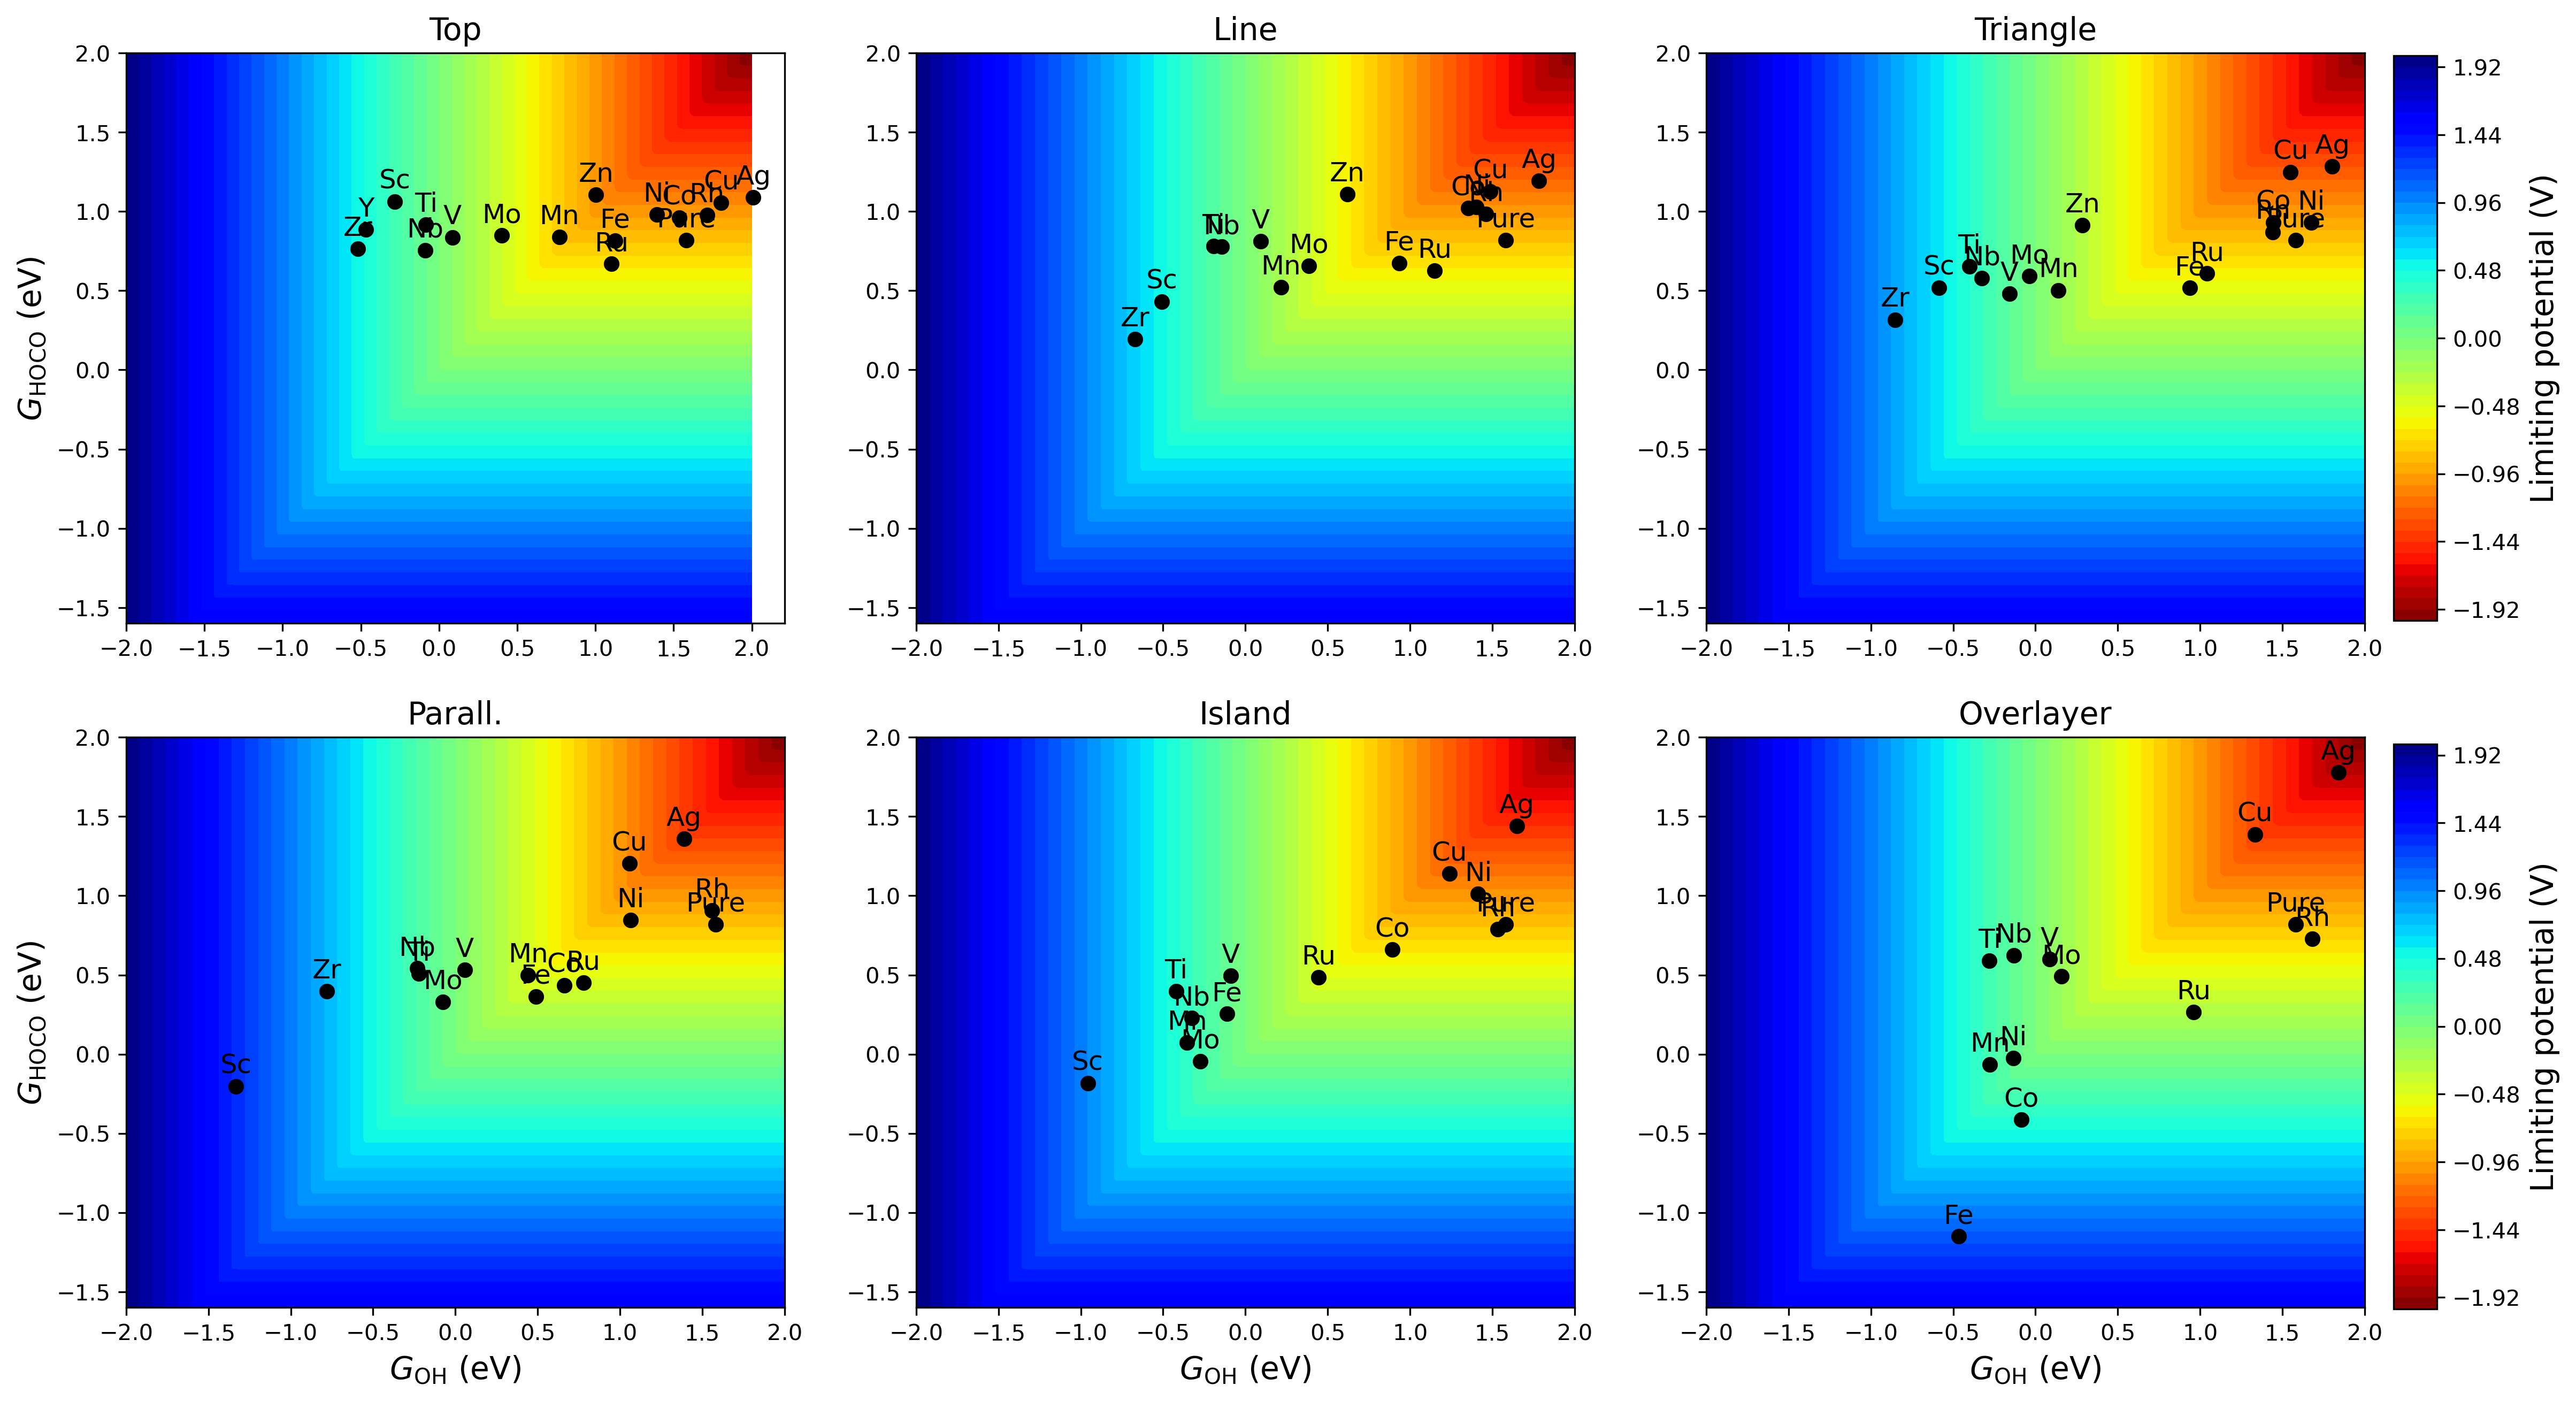

In [14]:
import sys
sys.path.append("../../..")

from plotpackage.lib.io import read_excel, read_csv
from plotpackage.lib.CO2RR import CO2RRFEDplot
from plotpackage.lib.scalingrelation import ScalingRelationPlot
from plotpackage.lib.figsmetadata import FigsMetaData
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp
from CO2toCO_acid import CO2toCO
from matplotlib import rc
# rc('font', **{'family':'sans-serif','sans-serif':['Helvetica'], 'size':8})

limiting_potenital = 0
def limiting(GHOCO, GOH, T):

    limiting_potenital = max(GHOCO/(-1), GOH/(-1)) 

    return limiting_potenital

T = 297.15
N = 100
M = N +100
GOHs = np.linspace(-2, 2, N)
GHOCOs = np.linspace(-1.6, 2, M)

limit = np.empty((M,N))
for j, GOH in enumerate(GOHs):   # column
    for i, GHOCO in enumerate(GHOCOs):  # row
        limit[i][j] = limiting(GHOCO, GOH, T)

filename = './sites.xlsx'
#change it for excel and csv; ignore sheet, min_row, max_row, row_of_tag and col_of_ini_tag for csv
min_col = 24 #1st column in excel
max_col = 29 #5th column in excel

index = 0
fig = plt.figure(figsize=(18, 16), dpi = 300)
text = ['Top', 'Line', 'Triangle', 'Parall.', 'Island', 'Overlayer']
# col1 = [2, 2, 2, 3, 3, 5] #column in excel
# col2 = [3, 5, 4, 5, 4, 4] #column in excel
col1=2 # column in excel
col2=5 # column in excel
col1 = col1 - 2
col2 = col2 - 2
for types in ['single_b', 'dimer_b', 'triangle_b', 'paral_b', 'island_b', 'overly_b']:
    #change it only for excel
    sheet = types #Sheet1 by defaut
    min_row = 1+1 #1st column in excel
    max_row = 18+1 #9st column in excel
    
    ############ plot free energy diagram ###############
    stepsNames, observationName, X = read_excel(filename, sheet, min_col, max_col, min_row, max_row) #load excel data
    #stepsNames, observationName, X = read_csv(filename, , min_col, max_col) #load csv data
    
    # # del rows; delete according to element names in excel
    del_ele = []   
    if types == 'single_b':
            del_ele = [] #remove distortion for near
    elif types == 'dimer_b':
        del_ele = ['Y', ] #remove distortion for line
    elif types == 'triangle_b':
        del_ele = ['Y',] #remove distortion for triangle
    elif types == 'paral_b':
        del_ele = ['Zn', 'Y',] #remove distortion for paral
    elif types == 'island_b':
        del_ele = ['Zn', 'Y', 'Zr'] #remove distortion for island
    elif types == 'overly_b':
        del_ele = ['Sc', 'Zn', 'Y', 'Zr'] #remove distortion for line
        
    del_rows = [observationName.index(each)+2 for each in del_ele]
    ### del_rows = [10, 12, 13, 18]  #delete according to rows in excel
    del_list = [x - 2 for x in del_rows]
    observationName = np.delete(observationName, del_list, 0)
    X = np.delete(X, del_list, 0)
#     print(X)
    print(observationName)
    
    ax = plt.subplot(3, 3, index + 1)
    GHOCO_d = (X[:, col1]).astype(float) 
    GOH_d = (X[:, col2]).astype(float) 
#     print(GHOCO_d)
#     print(GOH_d)
    # plot contour images
    contours = np.linspace(np.min(limit), np.max(limit), 51) 
    # print(np.min(limit), np.max(limit))
    cp = ax.contourf(GOHs, GHOCOs, limit, np.round(contours, 2), cmap=plt.cm.jet_r) # X=columns, Y=rows, Z in z direction
    
    # plot scaling relation
    for i,metal in enumerate(observationName):
        plt.plot(GOH_d[i], GHOCO_d[i], 'o', color='black') 
        plt.text(GOH_d[i], GHOCO_d[i]+0.05, metal, fontsize=12, horizontalalignment='center', verticalalignment='bottom')
    m, b = np.polyfit(GHOCO_d, GOH_d, 1)
    

    plt.title(text[index], fontsize=14)
    if index==3 or index==4 or index==5:
        plt.xlabel(r'$G_{\mathrm{OH}}$ (eV)', fontsize=14)
    if index==0 or index==3:
        plt.ylabel(r'$G_{\mathrm{HOCO}}$ (eV)', fontsize=14)
    if index==2:
        cbaxes = fig.add_axes([0.91, 0.659, 0.015, 0.22]) #Add position (left, bottom, width, height)
        bar = fig.colorbar(cp, cax=cbaxes)
        bar.set_label(r'Limiting potential (V)', fontsize=14)
    if index==5:
        cbaxes = fig.add_axes([0.91, 0.391, 0.015, 0.22]) #Add position (left, bottom, width, height)
        bar = fig.colorbar(cp, cax=cbaxes)
        bar.set_label(r'Limiting potential (V)', fontsize=14)
    
    index = index +1
    
# plt.savefig('../data/limiting potential.png', dpi=300)    
plt.show()

In [ ]:
# !pip install -q latextable

In [2]:
%matplotlib inline
import sys
sys.path.append("../../..")

from plotpackage.lib.io import read_excel, read_csv
from plotpackage.lib.CO2RR import CO2RRFEDplot
from plotpackage.lib.scalingrelation import ScalingRelationPlot
from plotpackage.lib.figsmetadata import FigsMetaData
import matplotlib.pyplot as plt
import numpy as np

filename = './sites.xlsx'
#change it for excel and csv; ignore sheet, min_row, max_row, row_of_tag and col_of_ini_tag for csv
min_col = 24 #1st column in excel
max_col = 29 #5th column in excel

text = ['Single', 'Dimer', 'Triangle', 'Parall.', 'Island', 'Overlayer']

i = 0
for types in ['single_b', 'dimer_b', 'triangle_b', 'paral_b', 'island_b', 'overly_b']:
    #change it only for excel
    sheet = types #Sheet1 by defaut
    min_row = 2 #1st column in excel
    max_row = 19 #9st column in excel

    ############ plot free energy diagram ###############
    stepsNames, observationName, X = read_excel(filename, sheet, min_col, max_col, min_row, max_row) #load excel data
    stepsNames = ["$\Delta G_{HOCO*}$", '$\Delta G_{CO*}$', '$\Delta G_{H*}$', '$\Dleta G_{OH*}$', '$\Dleta G_{HOCO*}-\Dleta G_{H*}$']
    #stepsNames = ['G(HOCO*)', 'G(CO*)', 'G(H*)', 'G(OH*)', 'G(HOCO*)-G(H*)']
    
#     print(X)
    from tabulate import tabulate
    from texttable import Texttable
    import latextable

#     rows = [['Rocket', 'Organisation', 'LEO Payload (Tonnes)', 'Maiden Flight'],
#             ['Saturn V', 'NASA', '140', '1967'],
#             ['Space Shuttle', 'NASA', '24.4', '1981'],
#             ['Falcon 9 FT-Expended', 'SpaceX', '22.8', '2017'],
#             ['Ariane 5 ECA', 'ESA', '21', '2002']]

#     table = Texttable()
#     table.set_cols_align(["c"] * 5)
#     table.set_deco(Texttable.HEADER | Texttable.VLINES)
#     table.add_rows(rows)

#     print('Tabulate Table:')
#     print(tabulate(rows, headers='firstrow'))

#     print('\nTexttable Table:')
#     print(table.draw())

#     print(np.asarray(observationName))
#     print(X)
#     assert False
#    {>{\centering\arraybackslash} m{2.1cm} >{\centering\arraybackslash} m{2.1cm} >{\centering\arraybackslash} m{2.1cm} >{\centering\arraybackslash} m{2.1cm} >{\centering\arraybackslash} m{2.1cm} >{\centering\arraybackslash} m{3.1cm} } 
    rows = np.concatenate((np.asarray(observationName).reshape(-1,1), np.round(X, 3)), axis=1)
    print('\n Table for {}:\\\ '.format(text[i]))
    print("\\begin{center}")
    print(tabulate(rows, headers=stepsNames, tablefmt='latex_raw', colalign=("center")))
    print("\\end{center}")
    
#     print('\nTexttable Latex:')
#     print(latextable.draw_latex(table, caption="A comparison of rocket features."))
    
#     # # del rows; delete according to element names in excel
#     del_ele = []
#     if types == 'top-new':
#         del_ele = [] #remove distortion for near
#     elif types == 'line':
#         del_ele = ['Y', ] #remove distortion for line
#     elif types == 'triangle':
#         del_ele = ['Y',] #remove distortion for triangle
#     elif types == 'paral-new':
#         del_ele = ['Zn', 'Y',] #remove distortion for paral
#     elif types == 'island-new':
#         del_ele = ['Zn', 'Y', 'Zr'] #remove distortion for island
#     elif types == 'overly-new':
#         del_ele = ['Sc', 'Zn', 'Y', 'Zr'] #remove distortion for line
#     # del_ele += ['Ti', 'Sc', 'Nb', 'Zr', 'Y', 'Zn', 'V', 'Mn', 'Mo', 'Pure'] #double bond and pure

#     # dotColor = {'PdH': 'black', 'Pure': 'black', 'Pd': 'black', 'Sc': 'black', 'Ti': 'black', 'V': 'black', 
#     #             'Mn': 'black', 'Fe': 'red', 'Co': 'red', 'Ni': 'red', 'Cu': 'red', 
#     #             'Zn': 'black', 'Y': 'black', 'Zr': 'black', 'Nb': 'black', 'Mo': 'black', 'Ru': 'red',
#     #             'Rh': 'red', 'Ag': 'red'}

#     def delete(observationName, X, del_ele):
#         del_rows = [observationName.index(each)+2 for each in del_ele]
#         del_list = [x - 2 for x in del_rows]
#         observationName = np.delete(observationName, del_list, 0)
#         X = np.delete(X, del_list, 0)     
#         descriper1 = (X[:, col1]).astype(float) 
#         descriper2 = (X[:, col2]).astype(float)
#         return observationName, X, descriper1, descriper2

#     observationName1, X1, descriper11, descriper12 = delete(observationName, X, del_ele)
    i = i +1

print('===============================')


 Table for Single:\\ 
\begin{center}
\begin{tabular}{llllll}
\hline
      &   $\Delta G_{HOCO*}$ &   $\Delta G_{CO*}$ &   $\Delta G_{H*}$ &   $\Dleta G_{OH*}$ &   $\Dleta G_{HOCO*}-\Dleta G_{H*}$ \\
\hline
 Pure & 0.82                 & 0.216              & 0.501             & 1.581              & 0.319                              \\
 Sc   & 1.062                & 0.026              & 0.682             & -0.283             & 0.38                               \\
 Ti   & 0.917                & -0.213             & 0.674             & -0.083             & 0.242                              \\
 V    & 0.837                & -0.443             & 0.47              & 0.087              & 0.368                              \\
 Mn   & 0.839                & -1.029             & -0.054            & 0.77               & 0.893                              \\
 Fe   & 0.817                & -0.881             & -0.036            & 1.126              & 0.852                              \\
 Co   &


 Table for Island:\\ 
\begin{center}
\begin{tabular}{llllll}
\hline
      &   $\Delta G_{HOCO*}$ &   $\Delta G_{CO*}$ &   $\Delta G_{H*}$ &   $\Dleta G_{OH*}$ &   $\Dleta G_{HOCO*}-\Dleta G_{H*}$ \\
\hline
 Pure & 0.82                 & 0.216              & 0.501             & 1.581              & 0.319                              \\
 Sc   & -0.183               & 0.04               & 0.557             & -0.958             & -0.739                             \\
 Ti   & 0.397                & -0.242             & 0.222             & -0.421             & 0.175                              \\
 V    & 0.495                & -0.553             & 0.219             & -0.09              & 0.276                              \\
 Mn   & 0.073                & -1.562             & -0.595            & -0.354             & 0.667                              \\
 Fe   & 0.254                & -1.14              & -0.254            & -0.113             & 0.508                              \\
 Co   &